In [127]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [182]:
# Load the CSV file
file_path = "whr2023.csv"  # Replace with your file path
df = pd.read_csv(file_path, delimiter=";", decimal=",")  # Adjust decimal and delimiter if needed
df.head()


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,South Asia,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,South Asia,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,South Asia,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,South Asia,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


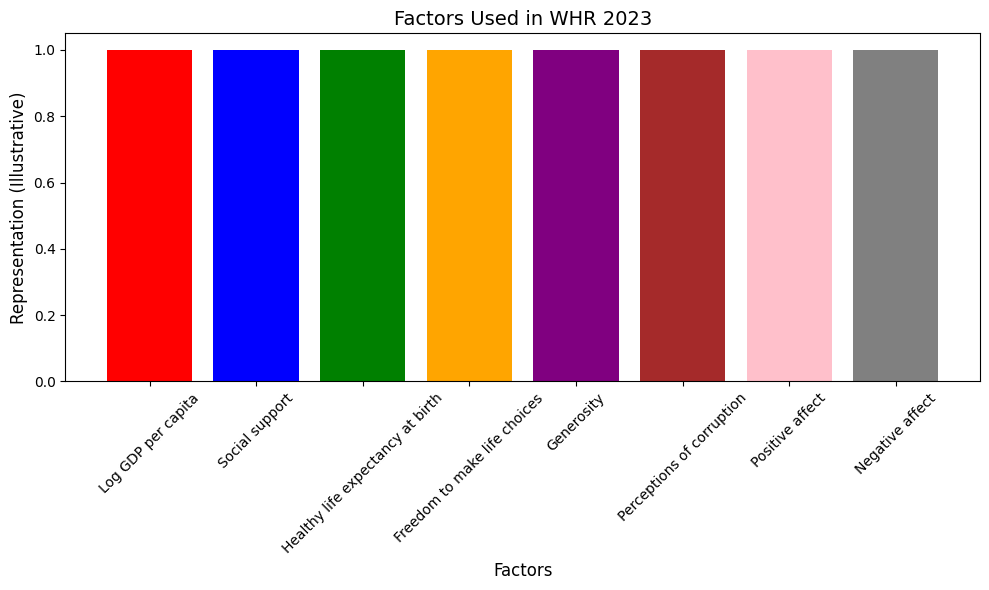

In [186]:
# Plot of WHR 2023 factors (without averaging, just listing key factors)
factors_labels = [
    'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'
]

# Generate a basic bar chart with dummy values for illustrative purposes
plt.figure(figsize=(10, 6))
plt.bar(factors_labels, [1] * len(factors_labels), color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'])
plt.title('Factors Used in WHR 2023', fontsize=14)
plt.ylabel('Representation (Illustrative)', fontsize=12)
plt.xlabel('Factors', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [129]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

# Print column names to verify
print("Column names:", df.columns)

Column names: Index(['Country name', 'Regional indicator', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [130]:
# Convert numerical columns to numeric
numerical_columns = [
    "Life Ladder", "Log GDP per capita", "Social support",
    "Healthy life expectancy at birth", "Freedom to make life choices",
    "Generosity", "Perceptions of corruption", "Positive affect",
    "Negative affect"
]

for col in numerical_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        print(f"Warning: Column '{col}' not found in the dataframe.")


In [131]:
# Check for NaN values after conversion
print("\nMissing values after processing:")
print(df.isnull().sum())


Missing values after processing:
Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In [132]:
# Display cleaned data in tabulate format
print(tabulate(df.head(), headers="keys", tablefmt="grid"))


+----+----------------+----------------------+--------+---------------+----------------------+------------------+------------------------------------+--------------------------------+--------------+-----------------------------+-------------------+-------------------+
|    | Country name   | Regional indicator   |   year |   Life Ladder |   Log GDP per capita |   Social support |   Healthy life expectancy at birth |   Freedom to make life choices |   Generosity |   Perceptions of corruption |   Positive affect |   Negative affect |
+====+================+======================+========+===============+======================+==================+====================================+================================+==============+=============================+===================+===================+
|  0 | Afghanistan    | South Asia           |   2008 |         3.724 |                7.35  |            0.451 |                               50.5 |                          0.718 |        0.

In [133]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   Regional indicator                2363 non-null   object 
 2   year                              2363 non-null   int64  
 3   Life Ladder                       2363 non-null   float64
 4   Log GDP per capita                2335 non-null   float64
 5   Social support                    2350 non-null   float64
 6   Healthy life expectancy at birth  2300 non-null   float64
 7   Freedom to make life choices      2327 non-null   float64
 8   Generosity                        2282 non-null   float64
 9   Perceptions of corruption         2238 non-null   float64
 10  Positive affect                   2339 non-null   float64
 11  Negative affect                   2347 non-null   float64
dtypes: flo

In [134]:
# Check missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In [135]:
# Check for missing Regional indicator values
if "Regional indicator" in df.columns:
    missing_regions = df[df["Regional indicator"].isnull()]
    print("Countries with missing Regional indicator:\n", missing_regions["Country name"].unique())


Countries with missing Regional indicator:
 []


In [136]:
# Fill missing values
df["Log GDP per capita"].fillna(df["Log GDP per capita"].mean(), inplace=True)
df["Social support"].fillna(df["Social support"].mean(), inplace=True)
df["Healthy life expectancy at birth"].fillna(df["Healthy life expectancy at birth"].mean(), inplace=True)
df["Freedom to make life choices"].fillna(df["Freedom to make life choices"].mean(), inplace=True)
df["Generosity"].fillna(df["Generosity"].median(), inplace=True)
df["Perceptions of corruption"].fillna(df["Perceptions of corruption"].median(), inplace=True)
df["Positive affect"].fillna(df["Positive affect"].mean(), inplace=True)
df["Negative affect"].fillna(df["Negative affect"].mean(), inplace=True)

# Verify that there are no missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
Country name                        0
Regional indicator                  0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\3620136350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Log GDP per capita"].fillna(df["Log GDP per capita"].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\3620136350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [137]:
# Dataset information after imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   Regional indicator                2363 non-null   object 
 2   year                              2363 non-null   int64  
 3   Life Ladder                       2363 non-null   float64
 4   Log GDP per capita                2363 non-null   float64
 5   Social support                    2363 non-null   float64
 6   Healthy life expectancy at birth  2363 non-null   float64
 7   Freedom to make life choices      2363 non-null   float64
 8   Generosity                        2363 non-null   float64
 9   Perceptions of corruption         2363 non-null   float64
 10  Positive affect                   2363 non-null   float64
 11  Negative affect                   2363 non-null   float64
dtypes: flo

In [138]:
# Descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,-0.000660,0.746855,0.651882,0.273151
std,5.059436,1.125522,1.145221,0.120878,6.750773,0.138291,0.158647,0.180321,0.105699,0.086835
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.520000,0.744000,59.545000,0.662000,-0.108000,0.696000,0.573000,0.209000
50%,2015.000000,5.449000,9.492000,0.834000,64.900000,0.769000,-0.022000,0.798500,0.662000,0.263000
75%,2019.000000,6.323500,10.382000,0.904000,68.400000,0.861000,0.088000,0.864000,0.736500,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [139]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Check the selected columns
print("\nNumeric columns used for correlation:")
print(numeric_df.columns)


Numeric columns used for correlation:
Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [140]:
# Fill missing values with column mean (if any)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
correlation_matrix


Correlation matrix:


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.046846,0.079284,-0.042979,0.165933,0.230838,0.032537,-0.080033,0.012986,0.207007
Life Ladder,0.046846,1.000000,0.774197,0.720745,0.710858,0.536136,0.171959,-0.418427,0.513537,-0.351734
Log GDP per capita,0.079284,0.774197,1.000000,0.673703,0.807812,0.357552,-0.002633,-0.334039,0.227357,-0.255316
Social support,-0.042979,0.720745,0.673703,1.000000,0.595627,0.402691,0.062771,-0.214864,0.423226,-0.454705
Healthy life expectancy at birth,0.165933,0.710858,0.807812,0.595627,1.000000,0.368450,0.013758,-0.289071,0.215247,-0.145969
Freedom to make life choices,0.230838,0.536136,0.357552,0.402691,0.368450,1.000000,0.313627,-0.448473,0.576304,-0.276308
Generosity,0.032537,0.171959,-0.002633,0.062771,0.013758,0.313627,1.000000,-0.260455,0.295024,-0.069828
Perceptions of corruption,-0.080033,-0.418427,-0.334039,-0.214864,-0.289071,-0.448473,-0.260455,1.000000,-0.269678,0.257129
Positive affect,0.012986,0.513537,0.227357,0.423226,0.215247,0.576304,0.295024,-0.269678,1.000000,-0.333292
Negative affect,0.207007,-0.351734,-0.255316,-0.454705,-0.145969,-0.276308,-0.069828,0.257129,-0.333292,1.000000


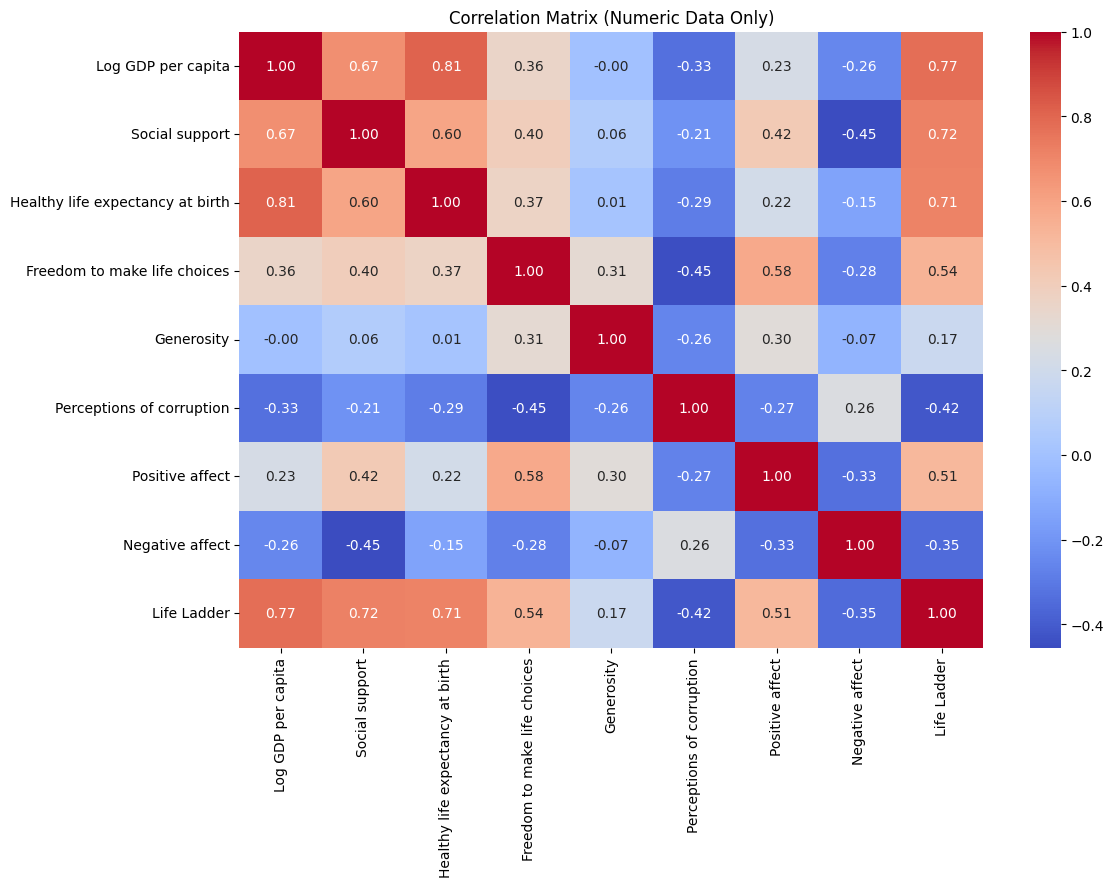

In [169]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Data Only)")
plt.show()

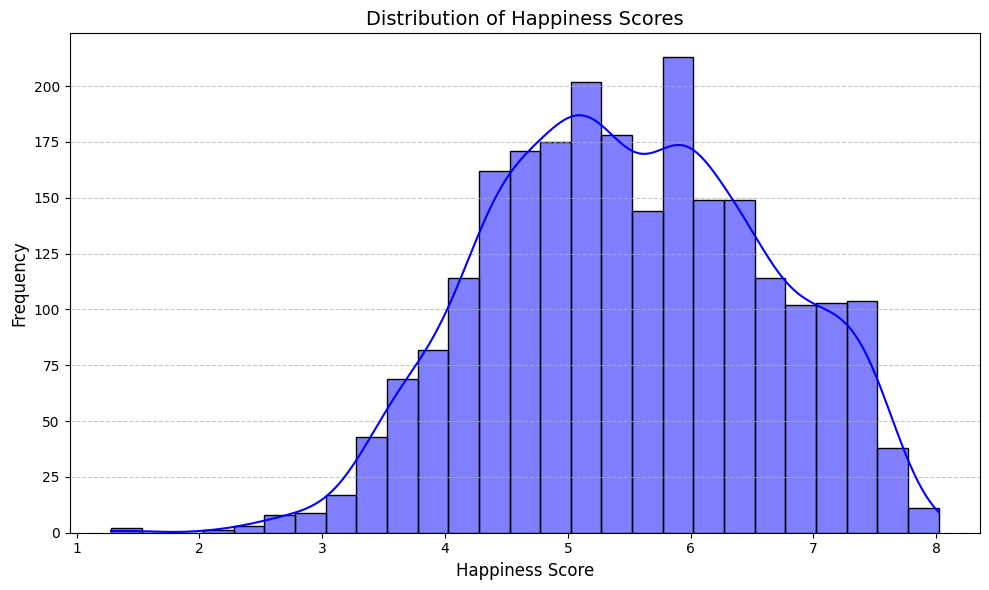

C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')


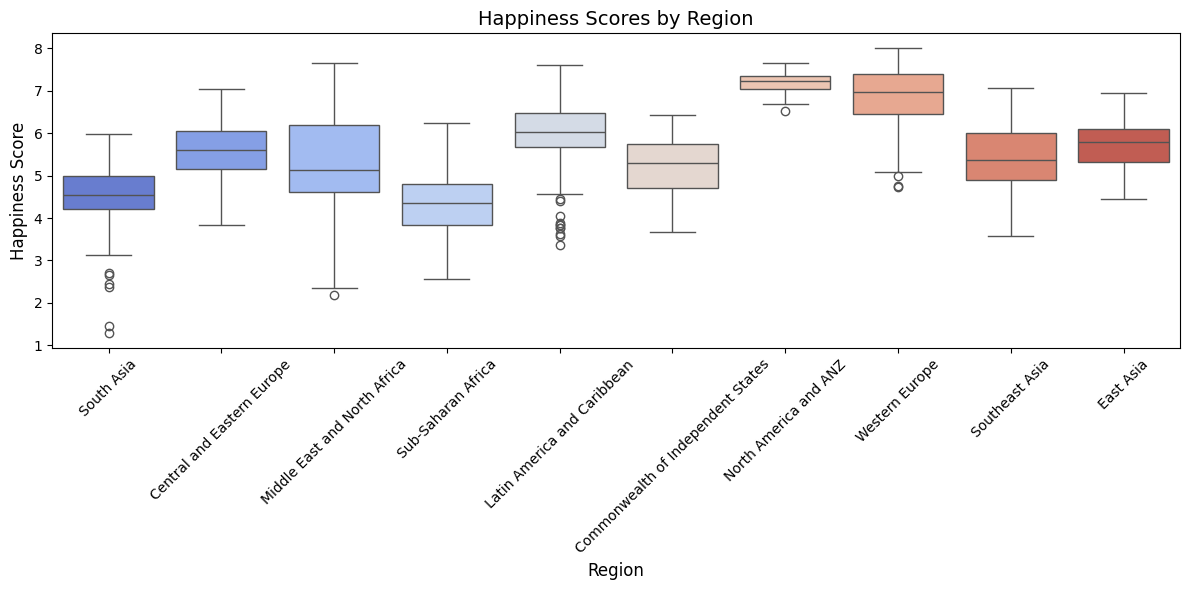

C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')


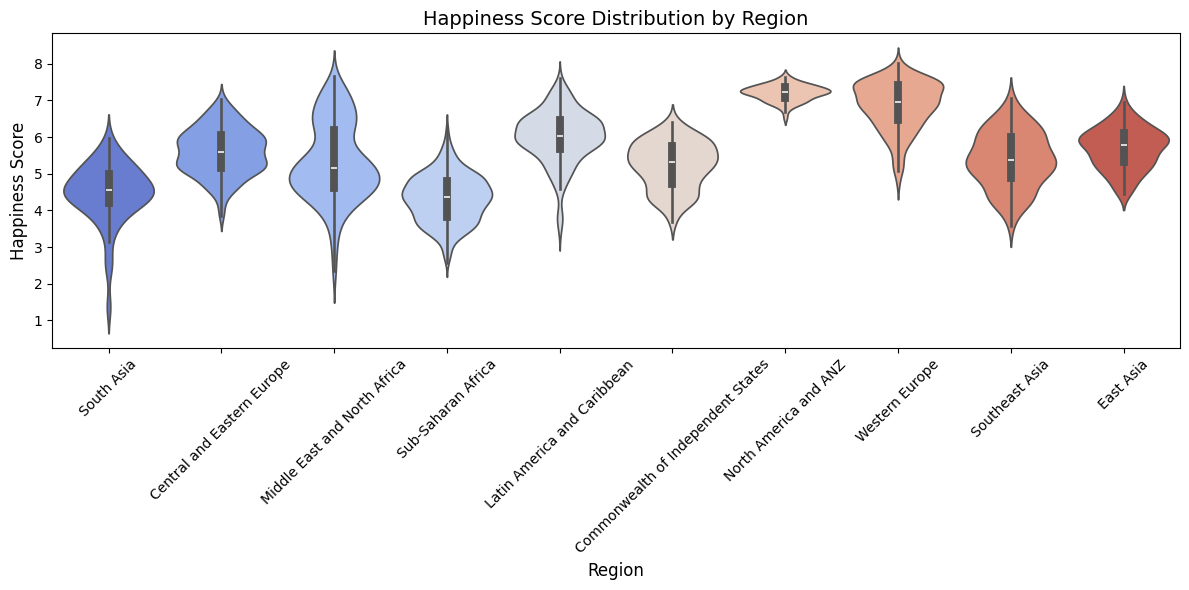

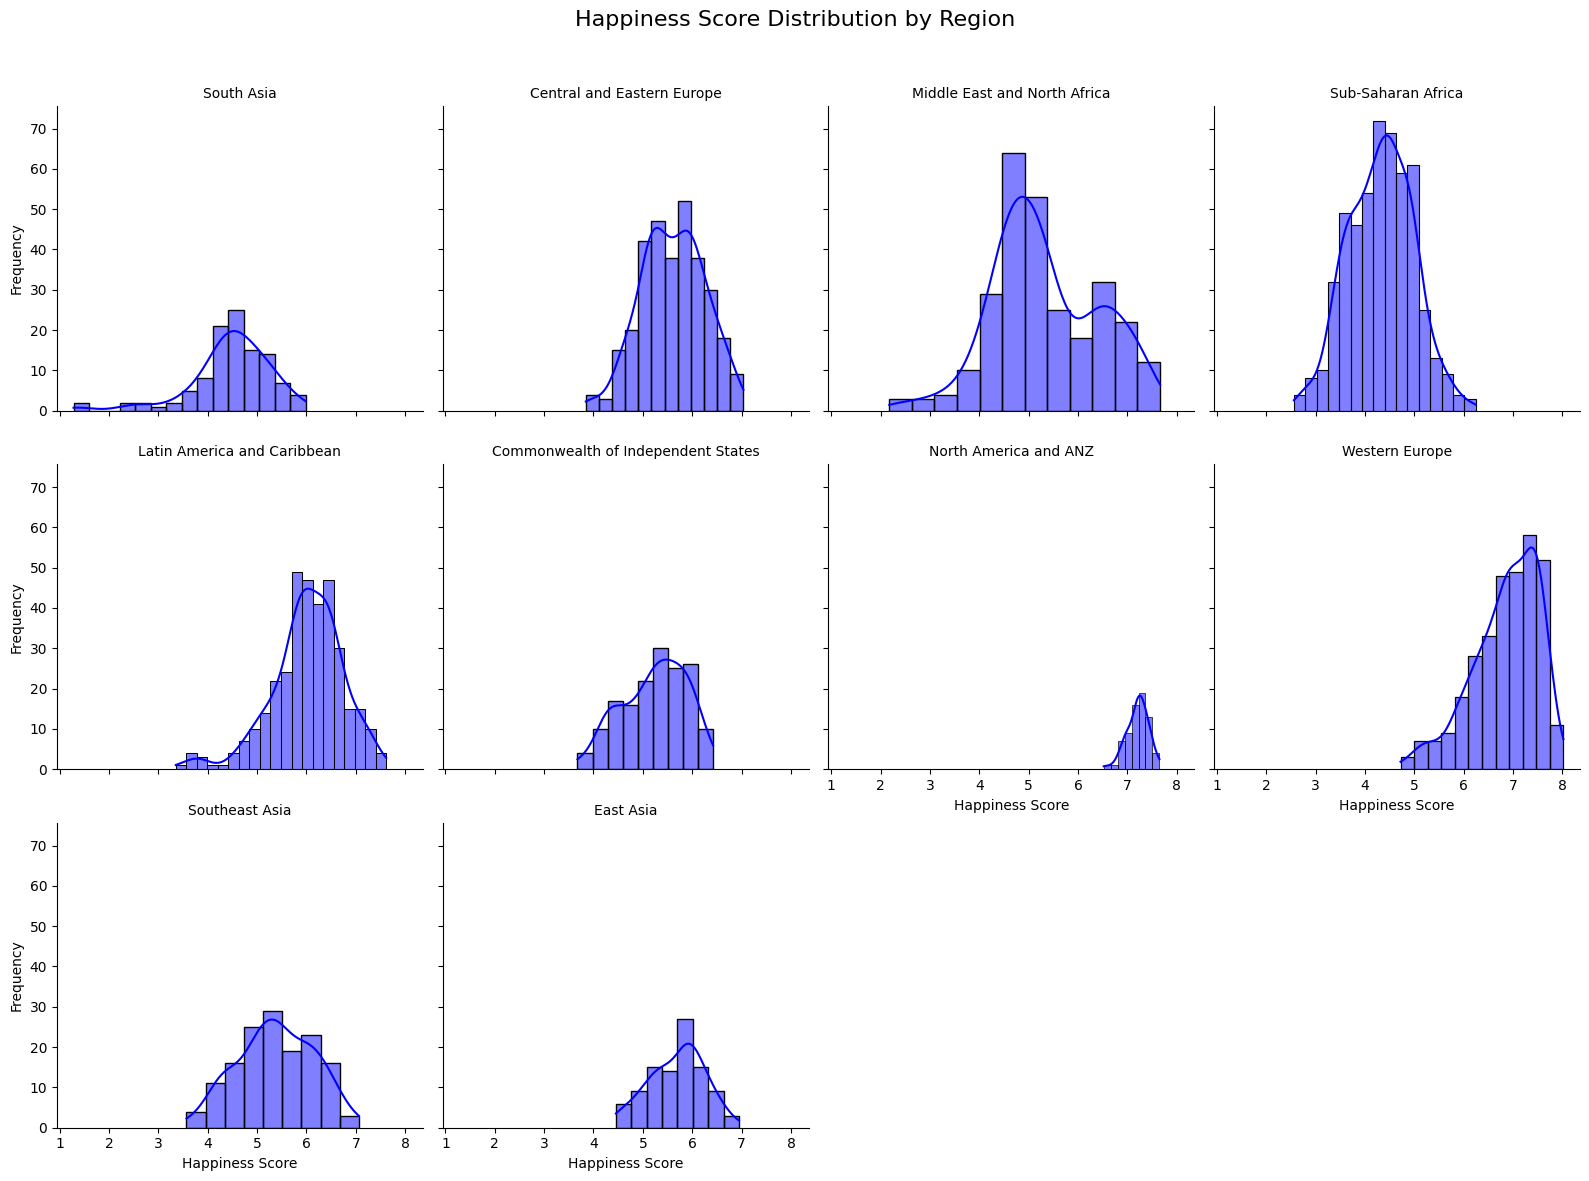

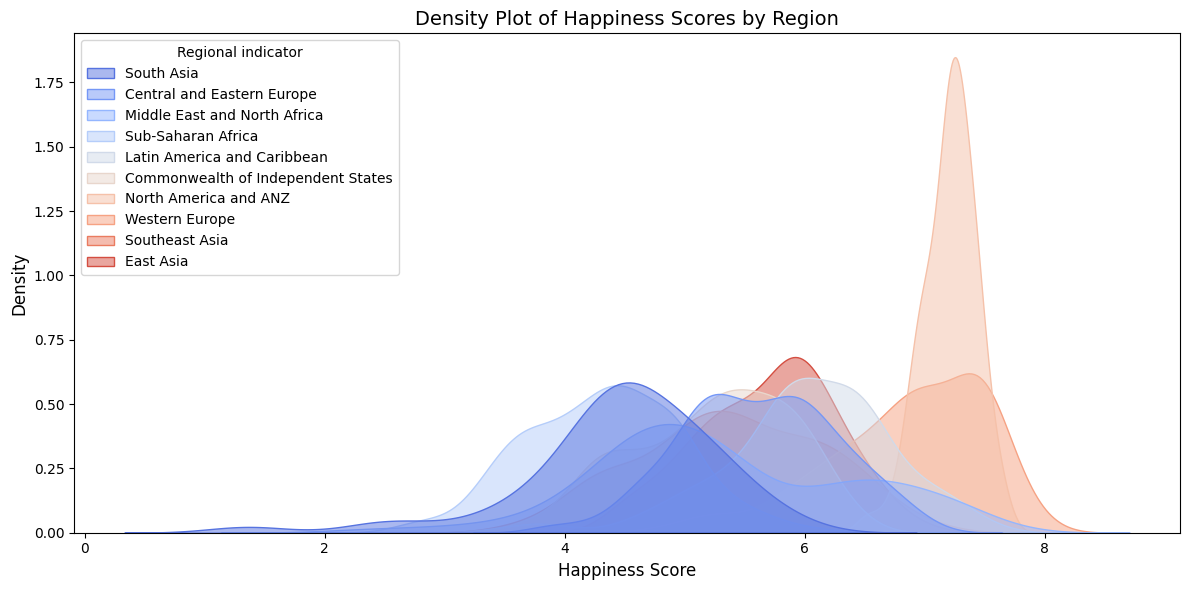

C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python312\Lib\site

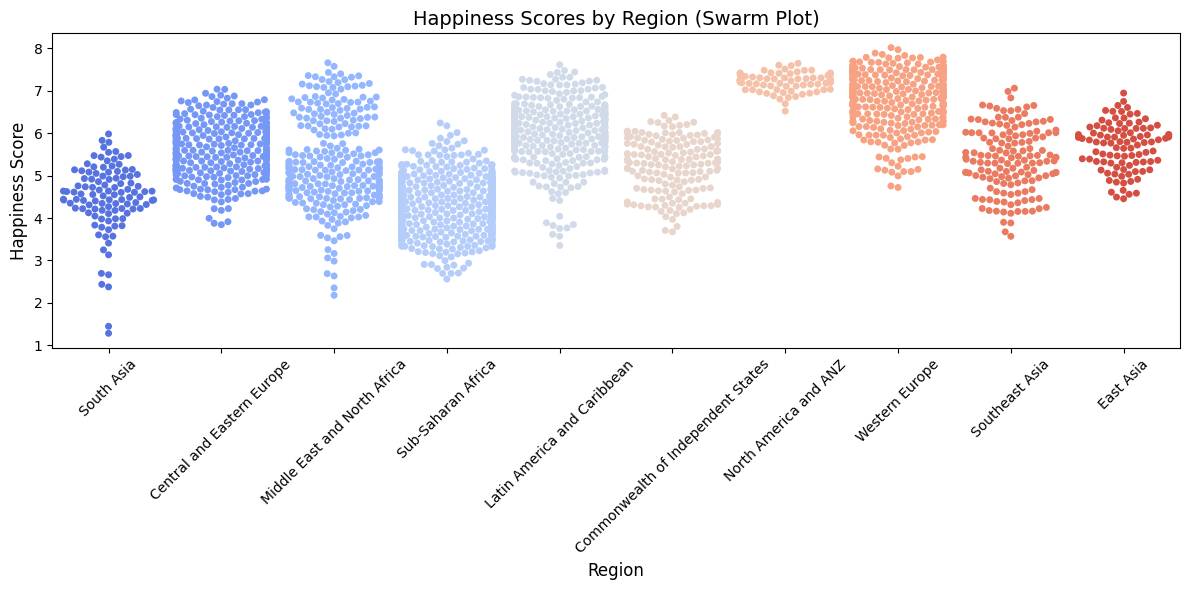

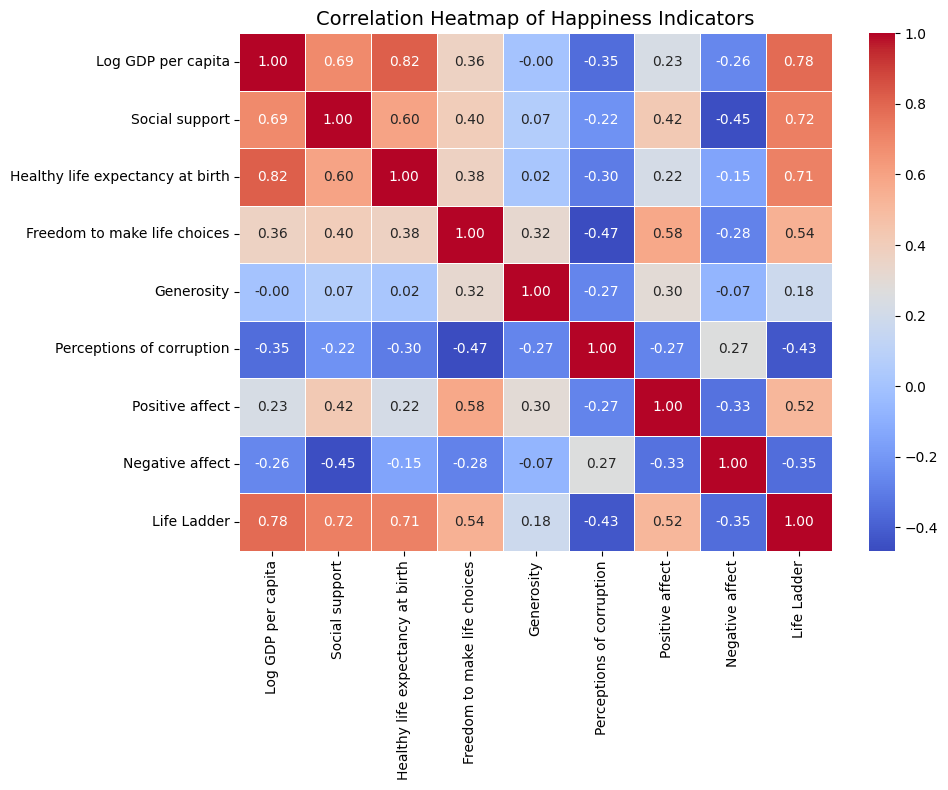

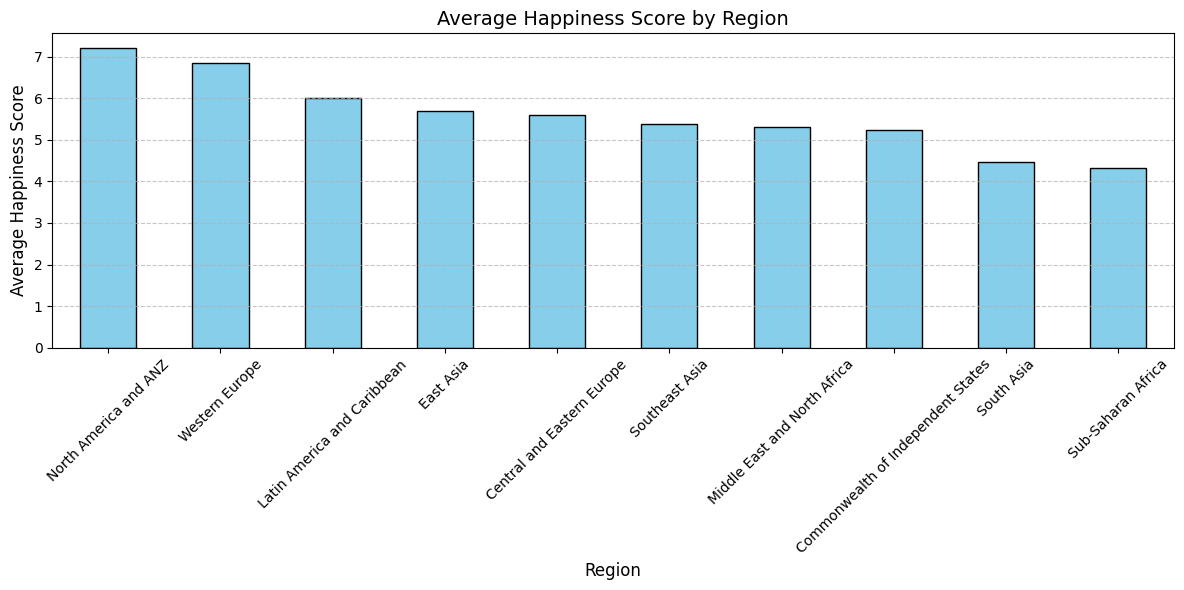

C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='happiness score', x='Country name', data=top_10_happy_country.iloc[:10], palette='coolwarm', ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='happiness score', x='Country name', data=bottom_10_happy_country.iloc[:10], palette='coolwarm', ax=ax[1])


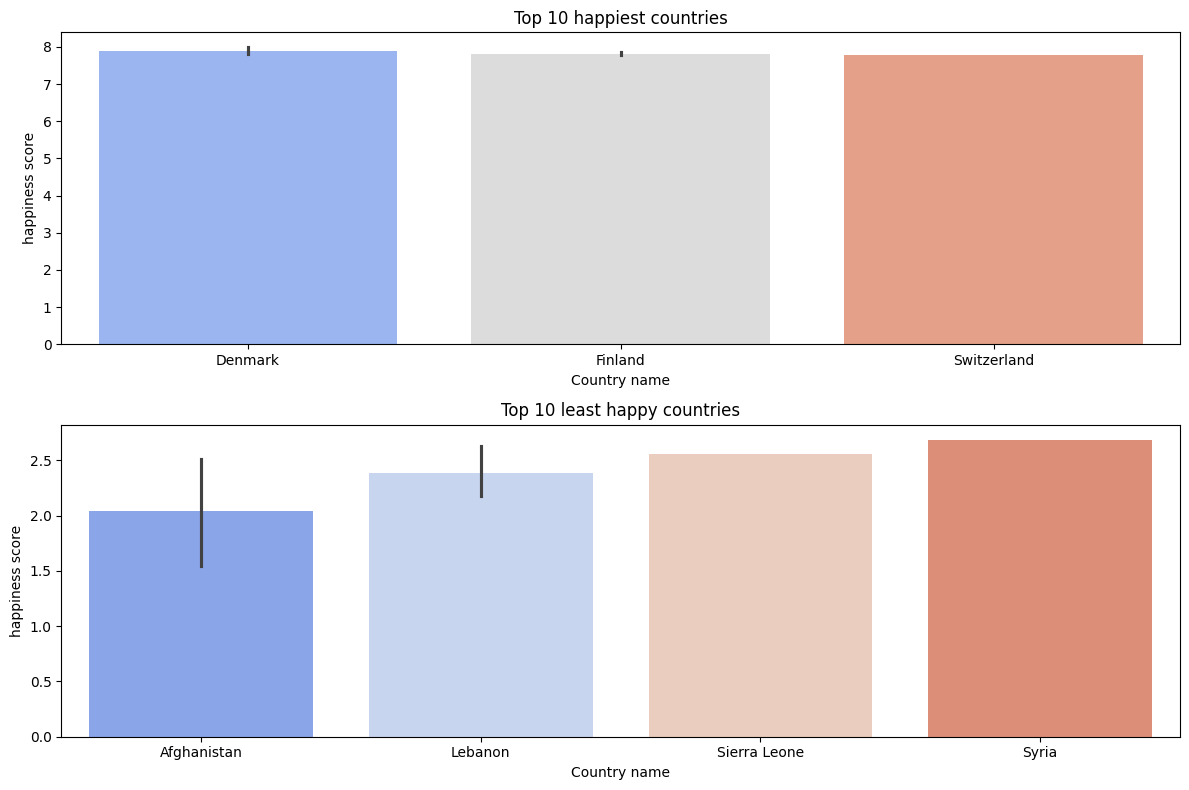

C:\Users\Admin\AppData\Local\Temp\ipykernel_33036\3804069029.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country name', x='Life Ladder', data=top_10_least_happy, palette='magma')


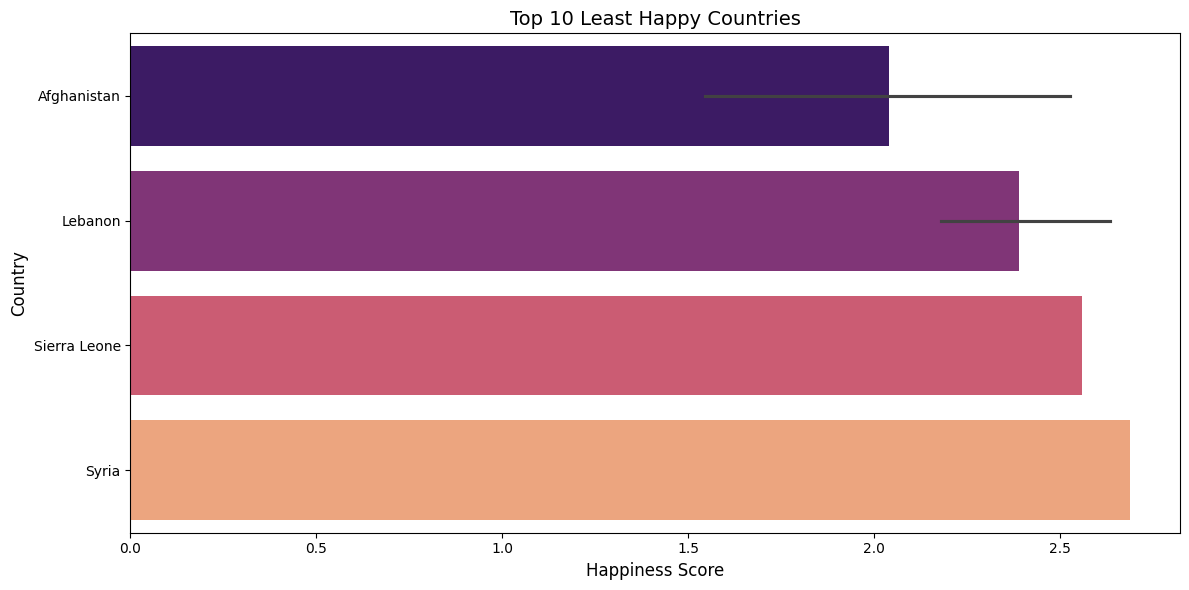

In [ ]:
# Re-import necessary libraries since the environment was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the WHR 2023 dataset (assume file is re-uploaded to same path as before)
file_path = 'whr2023.csv'

# Load the dataset with the correct delimiter and parse correctly
whr_data = pd.read_csv(file_path, delimiter=';', engine='python')

# Clean the dataset: Replace commas with dots and convert columns to numeric
columns_to_clean = [
    'Life Ladder', 'Log GDP per capita', 'Social support',
    'Healthy life expectancy at birth', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'
]

for column in columns_to_clean:
    whr_data[column] = whr_data[column].str.replace(',', '.').astype(float)

# Visualization 1: Distribution of Happiness Scores
plt.figure(figsize=(10, 6))
sns.histplot(whr_data['Life Ladder'], kde=True, color='blue')
plt.title('Distribution of Happiness Scores', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('happiness_distribution.png')
plt.show()
# Boxplot of Happiness Scores by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')
plt.title('Happiness Scores by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('happiness_boxplot_by_region.png')
plt.show()

# Violoin plot of Happiness Scores by Region
plt.figure(figsize=(12, 6))
sns.violinplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')
plt.title('Happiness Score Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('happiness_violinplot_by_region.png')
plt.show()

g = sns.FacetGrid(whr_data, col="Regional indicator", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Life Ladder", kde=True, color="blue")
g.set_titles("{col_name}")
g.set_axis_labels("Happiness Score", "Frequency")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Happiness Score Distribution by Region', fontsize=16)
plt.savefig('happiness_facetgrid_by_region.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=whr_data, x='Life Ladder', hue='Regional indicator', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('Density Plot of Happiness Scores by Region', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.savefig('happiness_density_by_region.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(data=whr_data, x='Regional indicator', y='Life Ladder', palette='coolwarm')
plt.title('Happiness Scores by Region (Swarm Plot)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('happiness_swarmplot_by_region.png')
plt.show()

# Visualization 2: Correlation Heatmap
correlation_matrix = whr_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Life Ladder']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Happiness Indicators', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Visualization 3: Happiness Score by Region
average_happiness_by_region = whr_data.groupby('Regional indicator')['Life Ladder'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_happiness_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Happiness Score by Region', fontsize=14)
plt.ylabel('Average Happiness Score', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('happiness_by_region.png')
plt.show()

# Create a DataFrame for happiness scores
happy_df = whr_data[['Country name', 'Life Ladder']].rename(columns={'Life Ladder': 'happiness score'})

# A column chart was created to analyze the top 10 happiest and least happy countries.
top_10_happy_country = happy_df.sort_values('happiness score', ascending=False)
bottom_10_happy_country = happy_df.sort_values('happiness score', ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.barplot(y='happiness score', x='Country name', data=top_10_happy_country.iloc[:10], palette='coolwarm', ax=ax[0])
ax[0].set_title("Top 10 happiest countries")

sns.barplot(y='happiness score', x='Country name', data=bottom_10_happy_country.iloc[:10], palette='coolwarm', ax=ax[1])
ax[1].set_title("Top 10 least happy countries")

fig.tight_layout()
plt.show()

# Visualization 5: Top 10 Least Happy Countries
top_10_least_happy = whr_data[['Country name', 'Life Ladder']].sort_values(by='Life Ladder').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y='Country name', x='Life Ladder', data=top_10_least_happy, palette='magma')
plt.title('Top 10 Least Happy Countries', fontsize=14)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_least_happy.png')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13276\2454192976.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_wise, x=column, y='Regional indicator', palette='coolwarm', ax=ax[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13276\2454192976.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_wise, x=column, y='Regional indicator', palette='coolwarm', ax=ax[i])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13276\2454192976.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_wise, x=column, y='Regional i

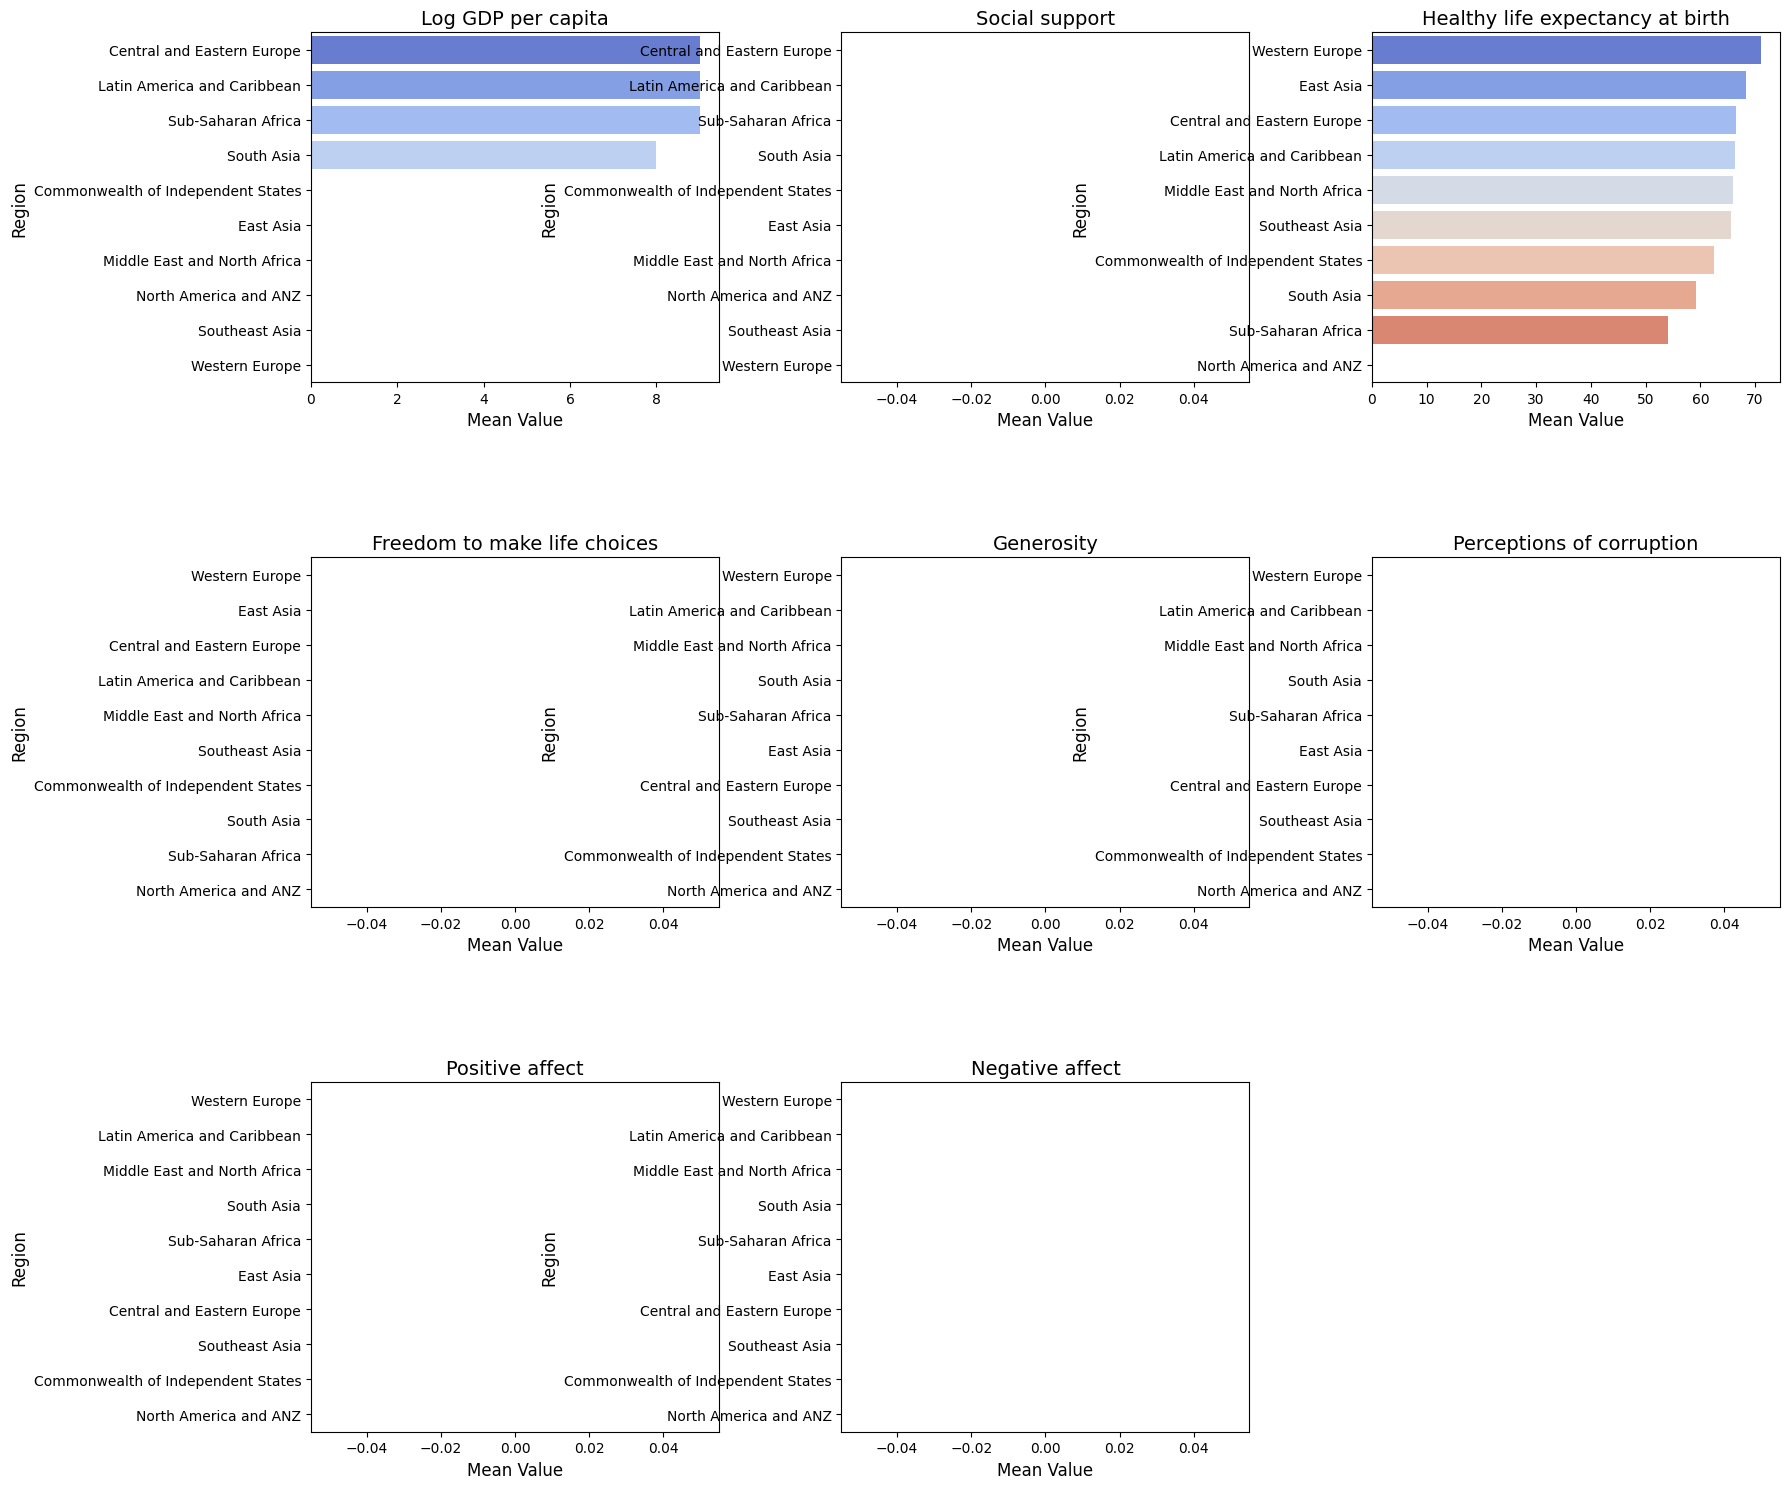

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=';')
df.columns = df.columns.str.strip()  # Clean column names

# Define numerical columns
numerical_columns = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]

# Ensure numerical columns are numeric
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group by 'Regional indicator' and calculate the mean
region_wise = df.groupby('Regional indicator')[numerical_columns].mean().reset_index()

# Calculate the grid size dynamically
num_columns = len(numerical_columns)
rows = math.ceil(num_columns / 3)  # Maximum 3 columns per row

# Create subplots for each numerical column
fig, ax = plt.subplots(rows, 3, figsize=(18, rows * 5))
ax = ax.flatten()  # Flatten axes for easy indexing

# Plot each column
for i, column in enumerate(numerical_columns):
    region_wise.sort_values(column, ascending=False, inplace=True)
    sns.barplot(data=region_wise, x=column, y='Regional indicator', palette='coolwarm', ax=ax[i])
    ax[i].set_title(column, fontsize=14)
    ax[i].set_xlabel("Mean Value", fontsize=12)
    ax[i].set_ylabel("Region", fontsize=12)

# Hide unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

# Adjust layout and spacing
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the plot
plt.show()


# Capture 2

In [142]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
import pandas as pd

# Ensure numerical_columns is defined
numerical_columns = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]

# Split the data into training and testing sets
X = df[numerical_columns]
y = df["Life Ladder"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize result storage
results = []

# Iterate over each feature
for feature in numerical_columns:
    print(f"\nEvaluating models for feature: {feature}")
    
    # Prepare X and y (using one feature at a time)
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]
    
    # =========================
    # Linear Regression
    # =========================
    lr_model = LinearRegression()
    lr_model.fit(X_train_single, y_train)
    y_pred_lr = lr_model.predict(X_test_single)
    
    # Metrics for Linear Regression
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    
    # =========================
    # Random Forest Regressor
    # =========================
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train_single, y_train)
    y_pred_rf = rf_model.predict(X_test_single)
    
    # Metrics for Random Forest
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    # =========================
    # Logistic Regression
    # =========================
    # Logistic Regression requires categorized target
    bins = [0, 5, 7, 10]  # Example bins for "low", "medium", "high"
    labels = ["Low", "Medium", "High"]
    y_train_categorized = pd.cut(y_train, bins=bins, labels=labels)
    y_test_categorized = pd.cut(y_test, bins=bins, labels=labels)

    log_reg_model = LogisticRegression(max_iter=500)
    log_reg_model.fit(X_train_single, y_train_categorized)
    y_pred_log_reg = log_reg_model.predict(X_test_single)
    
    # Metrics for Logistic Regression
    accuracy_log_reg = accuracy_score(y_test_categorized, y_pred_log_reg)
    
    # Store results for the feature
    results.append({
        "Feature": feature,
        "Linear Regression - MSE": mse_lr,
        "Linear Regression - MAE": mae_lr,
        "Linear Regression - R^2": r2_lr,
        "Random Forest - MSE": mse_rf,
        "Random Forest - MAE": mae_rf,
        "Random Forest - R^2": r2_rf,
        "Logistic Regression - Accuracy": accuracy_log_reg
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results as a table
from IPython.display import display
display(results_df)



Evaluating models for feature: Log GDP per capita

Evaluating models for feature: Social support

Evaluating models for feature: Healthy life expectancy at birth

Evaluating models for feature: Freedom to make life choices

Evaluating models for feature: Generosity

Evaluating models for feature: Perceptions of corruption

Evaluating models for feature: Positive affect

Evaluating models for feature: Negative affect


,Feature,Linear Regression - MSE,Linear Regression - MAE,Linear Regression - R^2,Random Forest - MSE,Random Forest - MAE,Random Forest - R^2,Logistic Regression - Accuracy
0,Log GDP per capita,0.554723,0.598064,0.558551,0.687246,0.639285,0.453089,0.657505
1,Social support,0.655302,0.659375,0.478511,0.704997,0.670062,0.438963,0.661734
2,Healthy life expectancy at birth,0.660201,0.658907,0.474612,0.713929,0.668090,0.431855,0.670190
3,Freedom to make life choices,0.870172,0.757314,0.307517,1.039998,0.826873,0.172369,0.581395
4,Generosity,1.205506,0.910595,0.040657,1.384193,0.950798,-0.101542,0.522199
5,Perceptions of corruption,0.996236,0.811891,0.207194,1.204179,0.865057,0.041714,0.572939
6,Positive affect,0.876813,0.759597,0.302231,0.978214,0.804667,0.221537,0.589852
7,Negative affect,1.073000,0.842005,0.146106,1.216329,0.884792,0.032044,0.619450


Correlations with Life Ladder (Happiness Score):
Log GDP per capita                  0.774197
Social support                      0.720745
Healthy life expectancy at birth    0.710858
Freedom to make life choices        0.536136
Positive affect                     0.513537
Generosity                          0.171959
Negative affect                    -0.351734
Perceptions of corruption          -0.418427
Name: Life Ladder, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\1904492600.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_happiness.values, y=correlation_with_happiness.index, palette="coolwarm")


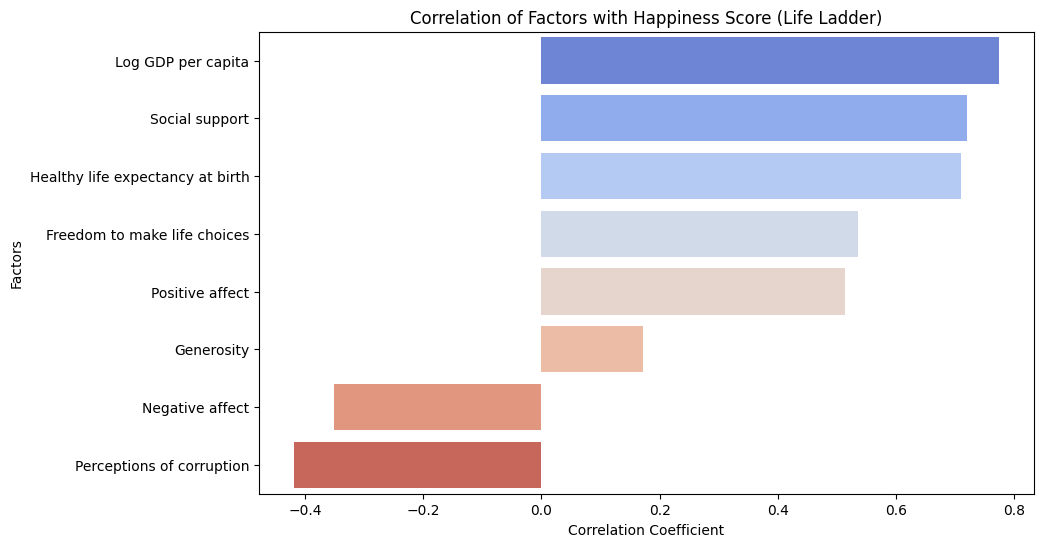

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded and 'numerical_columns' is defined
# Example numerical_columns definition for demonstration
numerical_columns = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]

# Compute the correlation matrix
correlation_matrix = df[numerical_columns + ["Life Ladder"]].corr()

# Extract correlations with 'Life Ladder'
correlation_with_happiness = correlation_matrix["Life Ladder"].drop("Life Ladder").sort_values(ascending=False)

# Display the correlations
print("Correlations with Life Ladder (Happiness Score):")
print(correlation_with_happiness)

# Visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_happiness.values, y=correlation_with_happiness.index, palette="coolwarm")
plt.title("Correlation of Factors with Happiness Score (Life Ladder)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Factors")
plt.show()


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Define numerical columns
numerical_columns = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]

# Remove "Life Ladder" from features
features_without_life_ladder = [col for col in numerical_columns if col != "Life Ladder"]

# Use X_train defined in CELL INDEX: 33
X_train, X_test, y_train, y_test = train_test_split(X_norway, y_norway, test_size=0.2, random_state=42)

# Train Random Forest model on remaining features
rf_model_without_life_ladder = RandomForestRegressor(random_state=42)
rf_model_without_life_ladder.fit(X_train[features_without_life_ladder], y_train)

# Extract feature importances
feature_importances_without_life_ladder = pd.Series(
    rf_model_without_life_ladder.feature_importances_, 
    index=features_without_life_ladder
).sort_values(ascending=False)

# Display feature importances
print("Feature Importances without Life Ladder:")
print(feature_importances_without_life_ladder)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_without_life_ladder.values, 
            y=feature_importances_without_life_ladder.index, 
            palette="viridis")
plt.title("Feature Importance by Random Forest (Without Life Ladder)")
plt.xlabel("Importance Score")
plt.ylabel("Factors")
plt.show()


NameError: name 'train_test_split' is not defined

# Hipotes Testi

C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\3781412544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean_scores.values, y=region_mean_scores.index, palette="viridis")


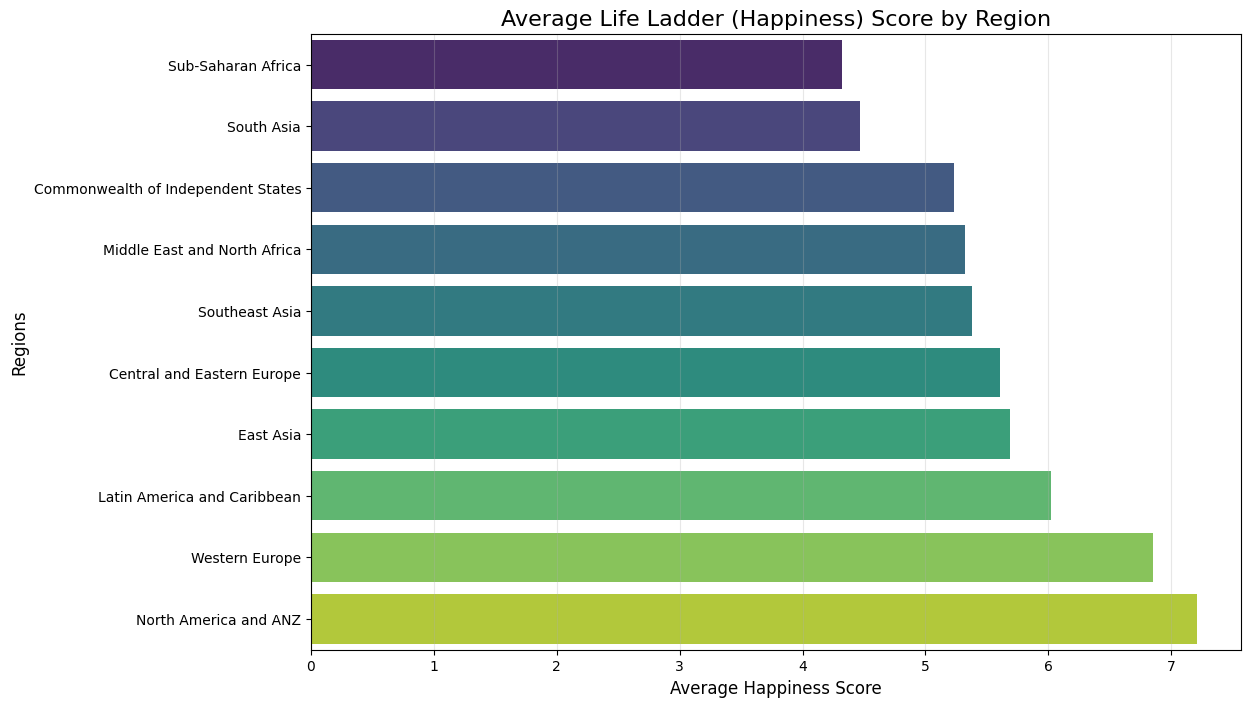

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean Life Ladder score for each region
region_mean_scores = df.groupby("Regional indicator")["Life Ladder"].mean().sort_values()

# Plot mean Life Ladder scores by region
plt.figure(figsize=(12, 8))
sns.barplot(x=region_mean_scores.values, y=region_mean_scores.index, palette="viridis")
plt.title("Average Life Ladder (Happiness) Score by Region", fontsize=16)
plt.xlabel("Average Happiness Score", fontsize=12)
plt.ylabel("Regions", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()


T-Test Results Between North America and ANZ and Western Europe:
T-Statistic: 7.7619460287838455
P-Value: 1.0178625698426886e-13

Reject the null hypothesis (H₀).
Conclusion: There is a significant difference in Life Ladder scores between North America and ANZ and Western Europe.


C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\471774422.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\471774422.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region2_scores, label=region2, shade=True, color="green")


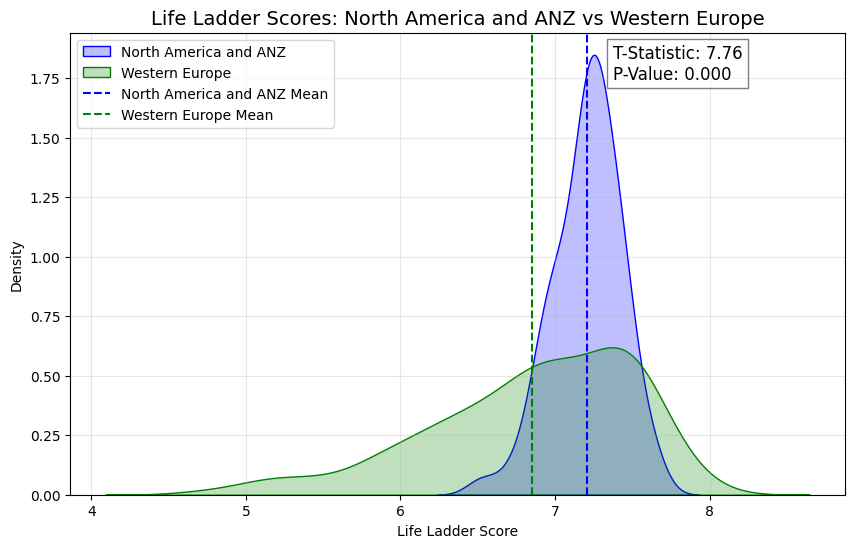

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Örnek olarak iki bölge seçelim
region1 = "North America and ANZ"
region2 = "Western Europe"

# İki bölgenin mutluluk skorlarını alalım
region1_scores = df[df["Regional indicator"] == region1]["Life Ladder"]
region2_scores = df[df["Regional indicator"] == region2]["Life Ladder"]

# T-Testi
t_stat, p_value = ttest_ind(region1_scores, region2_scores, equal_var=False)  # Varsayım: varyanslar eşit değil

# Sonuçları yazdır
print(f"T-Test Results Between {region1} and {region2}:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Hipotez testi yorumu
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis (H₀).")
    print(f"Conclusion: There is a significant difference in Life Ladder scores between {region1} and {region2}.")
else:
    print(f"\nFail to reject the null hypothesis (H₀).")
    print(f"Conclusion: There is no significant difference in Life Ladder scores between {region1} and {region2}.")


# Plot the distributions of Life Ladder for the two regions
plt.figure(figsize=(10, 6))
sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
sns.kdeplot(region2_scores, label=region2, shade=True, color="green")
plt.title(f"Life Ladder Scores: {region1} vs {region2}", fontsize=14)
plt.xlabel("Life Ladder Score")
plt.ylabel("Density")
plt.axvline(region1_scores.mean(), color="blue", linestyle="--", label=f"{region1} Mean")
plt.axvline(region2_scores.mean(), color="green", linestyle="--", label=f"{region2} Mean")
plt.legend()
plt.grid(alpha=0.3)

# Display T-Test results on the plot
plt.text(
    0.7, 0.9, f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.3f}", 
    fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor="white", alpha=0.5)
)
plt.show()

T-Test Results Between East Asia and Western Europe:
T-Statistic: -17.263099740591997
P-Value: 1.1442934584737488e-40

Reject the null hypothesis (H₀).
Conclusion: There is a significant difference in Life Ladder scores between East Asia and Western Europe.


C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\1808120252.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\1808120252.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region2_scores, label=region2, shade=True, color="green")


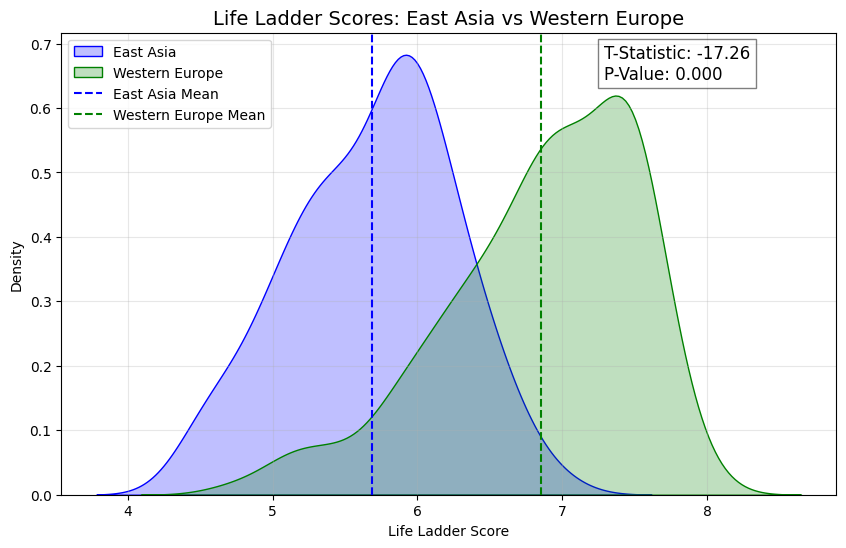

In [15]:
from scipy.stats import ttest_ind

# Örnek olarak iki bölge seçelim
region1 = "East Asia"
region2 = "Western Europe"

# İki bölgenin mutluluk skorlarını alalım
region1_scores = df[df["Regional indicator"] == region1]["Life Ladder"]
region2_scores = df[df["Regional indicator"] == region2]["Life Ladder"]

# T-Testi
t_stat, p_value = ttest_ind(region1_scores, region2_scores, equal_var=False)  # Varsayım: varyanslar eşit değil

# Sonuçları yazdır
print(f"T-Test Results Between {region1} and {region2}:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Hipotez testi yorumu
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis (H₀).")
    print(f"Conclusion: There is a significant difference in Life Ladder scores between {region1} and {region2}.")
else:
    print(f"\nFail to reject the null hypothesis (H₀).")
    print(f"Conclusion: There is no significant difference in Life Ladder scores between {region1} and {region2}.")


# Plot the distributions of Life Ladder for the two regions
plt.figure(figsize=(10, 6))
sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
sns.kdeplot(region2_scores, label=region2, shade=True, color="green")
plt.title(f"Life Ladder Scores: {region1} vs {region2}", fontsize=14)
plt.xlabel("Life Ladder Score")
plt.ylabel("Density")
plt.axvline(region1_scores.mean(), color="blue", linestyle="--", label=f"{region1} Mean")
plt.axvline(region2_scores.mean(), color="green", linestyle="--", label=f"{region2} Mean")
plt.legend()
plt.grid(alpha=0.3)

# Display T-Test results on the plot
plt.text(
    0.7, 0.9, f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.3f}", 
    fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor="white", alpha=0.5)
)
plt.show()

T-Test Results Between Central and Eastern Europe and Western Europe:
T-Statistic: -24.08005035489816
P-Value: 1.3691531914805616e-91

Reject the null hypothesis (H₀).
Conclusion: There is a significant difference in Life Ladder scores between Central and Eastern Europe and Western Europe.


C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\2327466734.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
C:\Users\Admin\AppData\Local\Temp\ipykernel_35564\2327466734.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(region2_scores, label=region2, shade=True, color="green")


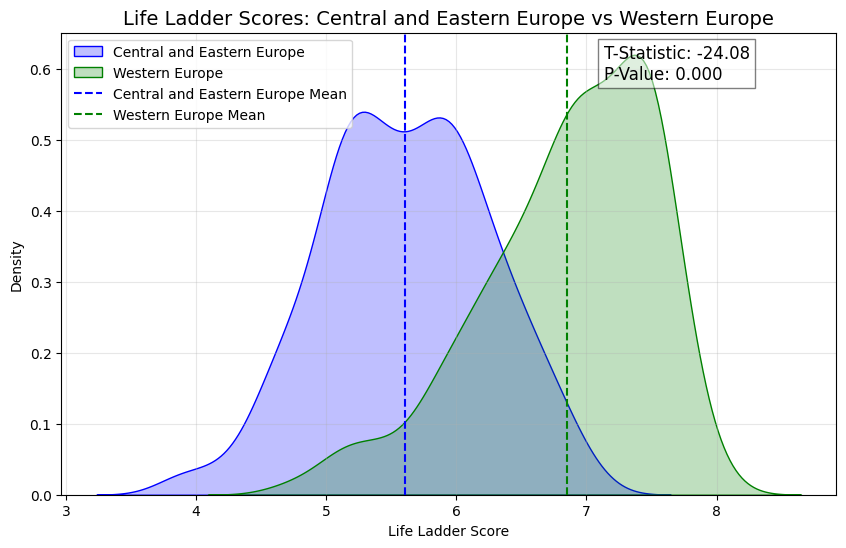

In [17]:
from scipy.stats import ttest_ind

# Örnek olarak iki bölge seçelim
region1 = "Central and Eastern Europe"
region2 = "Western Europe"

# İki bölgenin mutluluk skorlarını alalım
region1_scores = df[df["Regional indicator"] == region1]["Life Ladder"]
region2_scores = df[df["Regional indicator"] == region2]["Life Ladder"]

# T-Testi
t_stat, p_value = ttest_ind(region1_scores, region2_scores, equal_var=False)  # Varsayım: varyanslar eşit değil

# Sonuçları yazdır
print(f"T-Test Results Between {region1} and {region2}:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Hipotez testi yorumu
alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis (H₀).")
    print(f"Conclusion: There is a significant difference in Life Ladder scores between {region1} and {region2}.")
else:
    print(f"\nFail to reject the null hypothesis (H₀).")
    print(f"Conclusion: There is no significant difference in Life Ladder scores between {region1} and {region2}.")


# Plot the distributions of Life Ladder for the two regions
plt.figure(figsize=(10, 6))
sns.kdeplot(region1_scores, label=region1, shade=True, color="blue")
sns.kdeplot(region2_scores, label=region2, shade=True, color="green")
plt.title(f"Life Ladder Scores: {region1} vs {region2}", fontsize=14)
plt.xlabel("Life Ladder Score")
plt.ylabel("Density")
plt.axvline(region1_scores.mean(), color="blue", linestyle="--", label=f"{region1} Mean")
plt.axvline(region2_scores.mean(), color="green", linestyle="--", label=f"{region2} Mean")
plt.legend()
plt.grid(alpha=0.3)

# Display T-Test results on the plot
plt.text(
    0.7, 0.9, f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.3f}", 
    fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor="white", alpha=0.5)
)
plt.show()

# Norveç ve diğer İskandinav ülkeleri (örneğin, İsveç, Danimarka, Finlandiya, İzlanda) için mutluluk skorlarını karşılaştıran bir hipotez testi yapabiliriz. Bu, Independent Samples T-Test kullanılarak gerçekleştirilebilir.

In [150]:
from scipy.stats import ttest_ind

# Define Norway and Scandinavian countries
norway = "Norway"
scandinavian_countries = ["Sweden", "Denmark", "Finland", "Iceland"]

# Extract Life Ladder scores for Norway
norway_scores = df[df["Country name"] == norway]["Life Ladder"]

# Extract Life Ladder scores for other Scandinavian countries
scandinavian_scores = df[df["Country name"].isin(scandinavian_countries)]["Life Ladder"]

# Perform T-Test
t_stat, p_value = ttest_ind(norway_scores, scandinavian_scores, equal_var=False)

# Display results
print(f"T-Test Results Between Norway and Other Scandinavian Countries:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis (H₀).")
    print("Conclusion: There is a significant difference in Life Ladder scores between Norway and other Scandinavian countries.")
else:
    print("\nFail to reject the null hypothesis (H₀).")
    print("Conclusion: There is no significant difference in Life Ladder scores between Norway and other Scandinavian countries.")


T-Test Results Between Norway and Other Scandinavian Countries:
T-Statistic: -1.5005355343474782
P-Value: 0.1469432357898613

Fail to reject the null hypothesis (H₀).
Conclusion: There is no significant difference in Life Ladder scores between Norway and other Scandinavian countries.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\1295577908.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(norway_scores, label="Norway", shade=True, color="blue")
C:\Users\Admin\AppData\Local\Temp\ipykernel_17968\1295577908.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scandinavian_scores, label="Other Scandinavian Countries", shade=True, color="green")


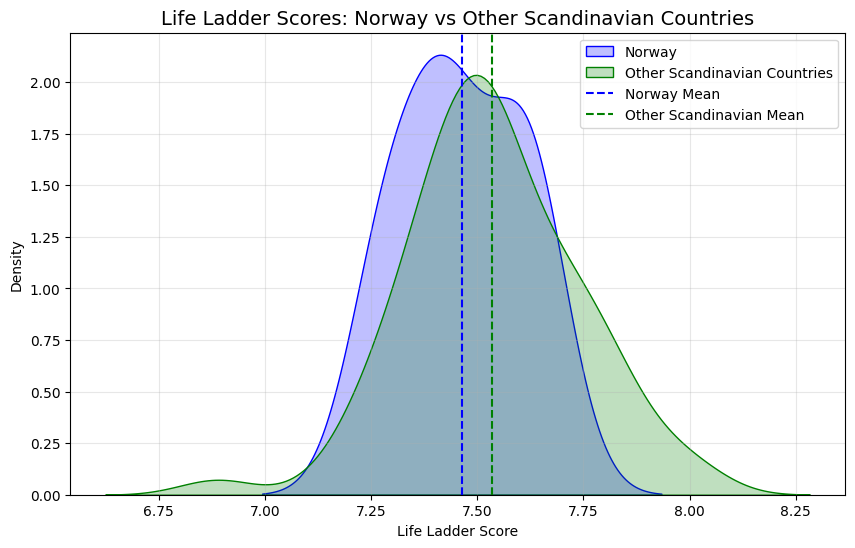

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(norway_scores, label="Norway", shade=True, color="blue")
sns.kdeplot(scandinavian_scores, label="Other Scandinavian Countries", shade=True, color="green")
plt.title("Life Ladder Scores: Norway vs Other Scandinavian Countries", fontsize=14)
plt.xlabel("Life Ladder Score")
plt.ylabel("Density")
plt.axvline(norway_scores.mean(), color="blue", linestyle="--", label="Norway Mean")
plt.axvline(scandinavian_scores.mean(), color="green", linestyle="--", label="Other Scandinavian Mean")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Norveç'e özel bir analiz yapmak için, Logistic Regression, Random Forest, ve Linear Regression modellerini yalnızca Norveç verileri üzerinde uygulayabiliriz. Aşağıdaki adımlarda her bir yöntemi nasıl uygulayabileceğinizi adım adım açıklıyorum

In [152]:
# Filter the dataset for Norway
norway_data = df[df["Country name"] == "Norway"]

# Define features and target
X_norway = norway_data[numerical_columns].drop("Life Ladder", axis=1, errors="ignore")
y_norway = norway_data["Life Ladder"]


In [153]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_norway, y_norway, test_size=0.2, random_state=42)


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results for Norway:")
print("Mean Squared Error (MSE):", mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("R-squared (R^2):", r2_lr)


Linear Regression Results for Norway:
Mean Squared Error (MSE): 0.04588961831968408
Mean Absolute Error (MAE): 0.1741610765185063
R-squared (R^2): -12.522577594039491


In [155]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results for Norway:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R^2):", r2_rf)


Random Forest Results for Norway:
Mean Squared Error (MSE): 0.016876911566665768
Mean Absolute Error (MAE): 0.11955666666666431
R-squared (R^2): -3.9732238916898357


In [156]:
! pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Evaluation Metrics for Logistic Regression (After Balancing):
Accuracy: 0.8097251585623678

Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.88      0.84       168
      Medium       0.88      0.74      0.81       252
        High       0.62      0.91      0.73        53

    accuracy                           0.81       473
   macro avg       0.77      0.84      0.79       473
weighted avg       0.83      0.81      0.81       473



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


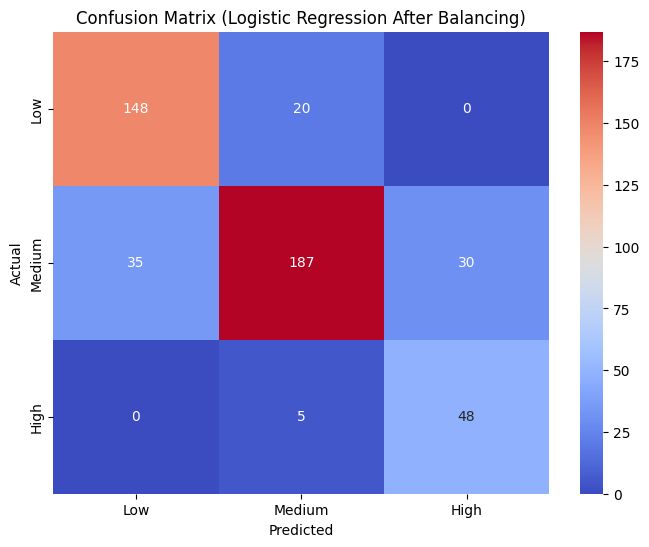

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Assuming `df` is already loaded and contains Norway data

# Step 1: Define target and features for classification
bins = [0, 5, 7, 10]
labels = [0, 1, 2]  # Encode categories as integers for classification
y = pd.cut(df["Life Ladder"], bins=bins, labels=labels, include_lowest=True).astype(int)
X = df[numerical_columns].drop("Life Ladder", axis=1, errors="ignore")

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=500, class_weight="balanced")
log_reg_model.fit(X_train_balanced, y_train_balanced)
y_pred_log_reg = log_reg_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg, target_names=["Low", "Medium", "High"])
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression (After Balancing):")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Logistic Regression After Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


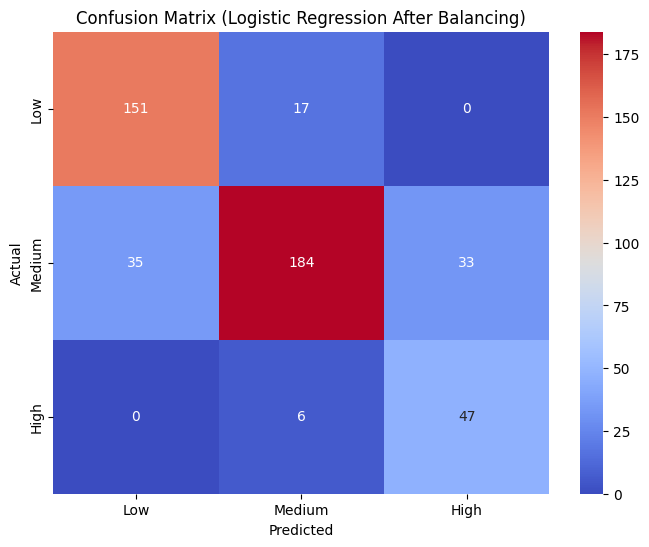

Model Results Comparison:
                 Model  Accuracy
0  Logistic Regression  0.807611
1        Random Forest  0.871036
2    Voting Classifier  0.873150
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

         Low       0.81      0.90      0.85       168
      Medium       0.89      0.73      0.80       252
        High       0.59      0.89      0.71        53

    accuracy                           0.81       473
   macro avg       0.76      0.84      0.79       473
weighted avg       0.83      0.81      0.81       473

Classification Report (Random Forest):
               precision    recall  f1-score   support

         Low       0.85      0.91      0.88       168
      Medium       0.90      0.85      0.88       252
        High       0.80      0.83      0.81        53

    accuracy                           0.87       473
   macro avg       0.85      0.86      0.86       473
weighted avg       0.87      0.87      0.87      

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains the dataset

# Step 1: Define target and features
bins = [0, 5, 7, 10]
labels = [0, 1, 2]  # Low, Medium, High
y = pd.cut(df["Life Ladder"], bins=bins, labels=labels, include_lowest=True).astype(int)
X = df[numerical_columns].drop("Life Ladder", axis=1, errors="ignore")

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 5: Logistic Regression with Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=500, class_weight="balanced"), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_balanced)
log_reg_model = grid_search.best_estimator_

y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=["Low", "Medium", "High"])
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Step 6: Random Forest
rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=["Low", "Medium", "High"])
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Step 7: Voting Classifier (Ensemble)
voting_model = VotingClassifier(estimators=[('lr', log_reg_model), ('rf', rf_model)], voting='soft')
voting_model.fit(X_train_balanced, y_train_balanced)
y_pred_voting = voting_model.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
class_report_voting = classification_report(y_test, y_pred_voting, target_names=["Low", "Medium", "High"])
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Step 8: Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Logistic Regression After Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Print Results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Voting Classifier"],
    "Accuracy": [accuracy_log_reg, accuracy_rf, accuracy_voting]
})

# Display results
print("Model Results Comparison:")
print(results)

print("Classification Report (Logistic Regression):\n", class_report_log_reg)
print("Classification Report (Random Forest):\n", class_report_rf)
print("Classification Report (Voting Classifier):\n", class_report_voting)


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'saga'}
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         Low       0.81      0.90      0.85       168
      Medium       0.89      0.73      0.80       252
        High       0.59      0.89      0.71        53

    accuracy                           0.81       473
   macro avg       0.76      0.84      0.79       473
weighted avg       0.83      0.81      0.81       473


Classification Report (Random Forest):
              precision    recall  f1-score   support

         Low       0.85      0.91      0.88       168
      Medium       0.90      0.85      0.88       252
        High       0.80      0.83      0.81        53

    accuracy                           0.87       473
   macro avg       0.85      0.86      0.86       473
weighted avg       0.87      0.87      0.87       473



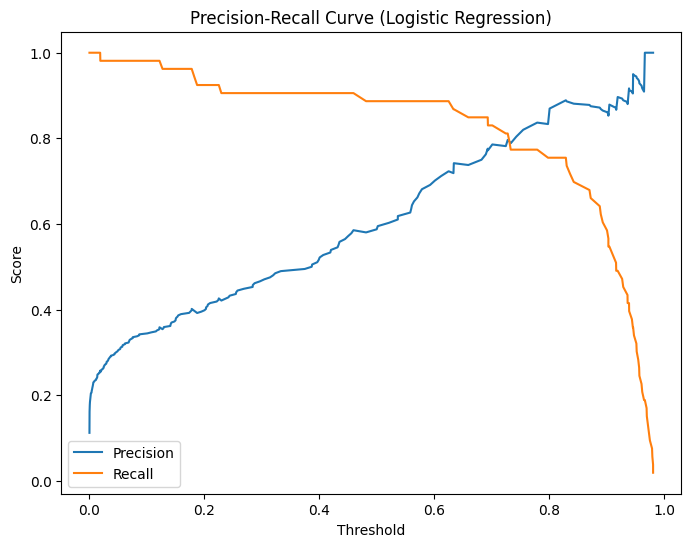

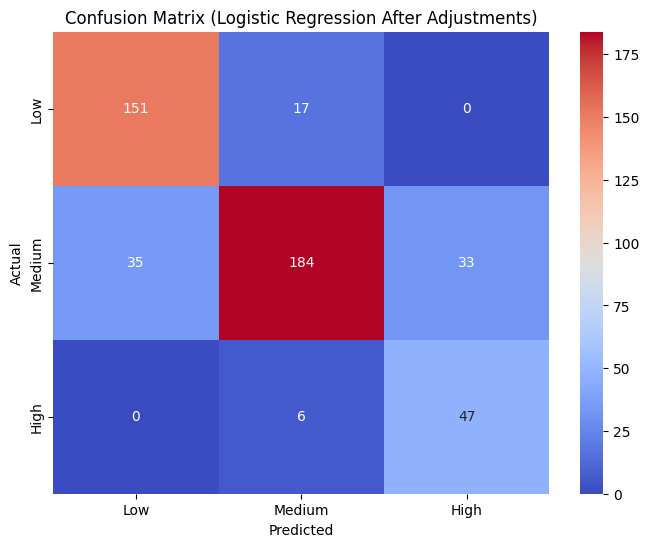


Cross-Validation F1-Score for Logistic Regression: 0.8095291010504109

Cross-Validation F1-Score for Random Forest: 0.8944703318966555


In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains the dataset

# Step 1: Define target and features
bins = [0, 5, 7, 10]
labels = [0, 1, 2]  # Low, Medium, High
y = pd.cut(df["Life Ladder"], bins=bins, labels=labels, include_lowest=True).astype(int)
X = df[numerical_columns].drop("Life Ladder", axis=1, errors="ignore")

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 4: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 5: Logistic Regression with Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=500, class_weight="balanced"), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train_balanced)
log_reg_model = grid_search.best_estimator_

# Step 6: Evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg, target_names=["Low", "Medium", "High"]))

# Step 7: Random Forest
rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=["Low", "Medium", "High"]))

# Step 8: Adjust Threshold for Logistic Regression
y_prob = log_reg_model.predict_proba(X_test_scaled)[:, 2]  # Probabilities for High class
precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label=2)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.legend()
plt.show()

# Adjust threshold
adjusted_threshold = 0.6
y_pred_adjusted = (y_prob >= adjusted_threshold).astype(int)

# Confusion Matrix After Threshold Adjustment
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix (Logistic Regression After Adjustments)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Cross-Validation for Logistic Regression
cv_scores = cross_val_score(log_reg_model, X_train_scaled, y_train_balanced, cv=5, scoring="f1_weighted")
print("\nCross-Validation F1-Score for Logistic Regression:", cv_scores.mean())

# Random Forest Evaluation
cv_scores_rf = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring="f1_weighted")
print("\nCross-Validation F1-Score for Random Forest:", cv_scores_rf.mean())


In [160]:
# A. Sıfırdan MLP Uygulaması
# Adım 1: Sıfırdan MLP Modeli Geliştirme
# Aşağıdaki kod, ileri yayılım (forward propagation), geri yayılım (backpropagation) ve ağırlık güncellemelerini içeren basit bir MLP (Multilayer Perceptron) modelini Python'da sıfırdan uygulamaktadır.

Epoch 1/500 - Train Loss: 1.1283, Train Acc: 0.3561, Test Loss: 1.1078, Test Acc: 0.3554
Epoch 2/500 - Train Loss: 1.1079, Train Acc: 0.3561, Test Loss: 1.0888, Test Acc: 0.3554
Epoch 3/500 - Train Loss: 1.0889, Train Acc: 0.3561, Test Loss: 1.0715, Test Acc: 0.3554
Epoch 4/500 - Train Loss: 1.0716, Train Acc: 0.3561, Test Loss: 1.0556, Test Acc: 0.3554
Epoch 5/500 - Train Loss: 1.0556, Train Acc: 0.3561, Test Loss: 1.0409, Test Acc: 0.4133
Epoch 6/500 - Train Loss: 1.0410, Train Acc: 0.4141, Test Loss: 1.0270, Test Acc: 0.7193
Epoch 7/500 - Train Loss: 1.0270, Train Acc: 0.7128, Test Loss: 1.0136, Test Acc: 0.5712
Epoch 8/500 - Train Loss: 1.0136, Train Acc: 0.5877, Test Loss: 1.0008, Test Acc: 0.5487
Epoch 9/500 - Train Loss: 1.0009, Train Acc: 0.5466, Test Loss: 0.9888, Test Acc: 0.5402
Epoch 10/500 - Train Loss: 0.9888, Train Acc: 0.5369, Test Loss: 0.9775, Test Acc: 0.5331
Epoch 11/500 - Train Loss: 0.9775, Train Acc: 0.5339, Test Loss: 0.9672, Test Acc: 0.5331
Epoch 12/500 - Trai

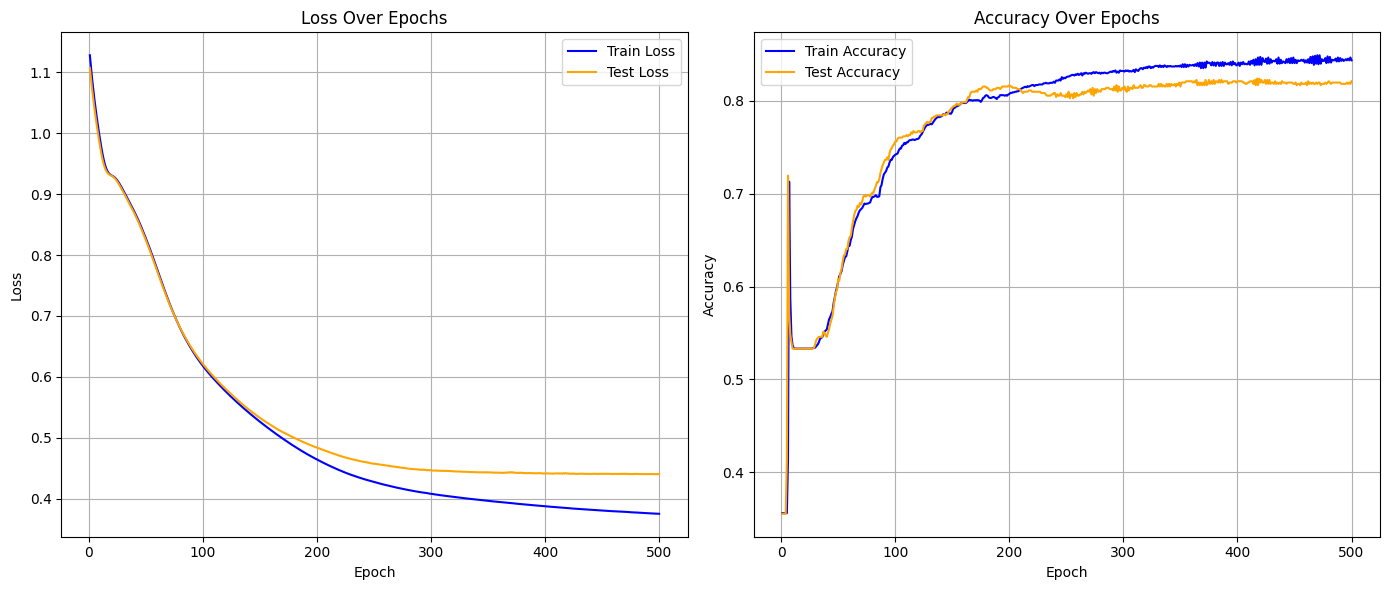

In [161]:
# Import necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("whr2023.csv", delimiter=";", decimal=",")

# Select numerical columns
numerical_columns = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]

# Prepare the input (X)
X = df[numerical_columns].fillna(0)

# Categorize the target variable (y)
bins = [0, 5, 7, 10]  # Define bins
labels = ["Low", "Medium", "High"]  # Define labels
y_categorized = pd.cut(df["Life Ladder"], bins=bins, labels=labels)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_categorized)  # Convert categories to numerical labels

# Split data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize input features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the MLP model for classification
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.001, device='cpu'):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.device = device
        self.learning_rate = learning_rate
        self.to(self.device)

    def forward(self, x):
        x = x.to(self.device)
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize model parameters
input_size = X_train.shape[1]  # Number of input features
hidden_size1 = 128
hidden_size2 = 64
output_size = len(labels)  # Number of classes
epochs = 500
learning_rate = 0.001
batch_size = 32

# Initialize model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mlp_model = MLP(input_size, hidden_size1, hidden_size2, output_size, learning_rate, device=device)
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(mlp_model.parameters(), lr=learning_rate)

# Training loop
history = {
    "train_loss": [],
    "test_loss": [],
    "train_accuracy": [],
    "test_accuracy": []
}

for epoch in range(1, epochs + 1):
    mlp_model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = mlp_model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    train_predictions = torch.argmax(outputs, axis=1)
    train_accuracy = (train_predictions == y_train_tensor).float().mean().item()

    # Backward pass
    train_loss.backward()
    optimizer.step()

    # Validation on the test set
    mlp_model.eval()
    with torch.no_grad():
        test_outputs = mlp_model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_predictions = torch.argmax(test_outputs, axis=1)
        test_accuracy = (test_predictions == y_test_tensor).float().mean().item()

    # Save history
    history["train_loss"].append(train_loss.item())
    history["test_loss"].append(test_loss.item())
    history["train_accuracy"].append(train_accuracy)
    history["test_accuracy"].append(test_accuracy)

    # Print metrics for this epoch
    print(f"Epoch {epoch}/{epochs} - Train Loss: {train_loss.item():.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Test Loss: {test_loss.item():.4f}, Test Acc: {test_accuracy:.4f}")

# Generate classification report at the end
mlp_model.eval()
with torch.no_grad():
    final_test_outputs = mlp_model(X_test_tensor)
    final_test_predictions = torch.argmax(final_test_outputs, axis=1).cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Generate the classification report
report = classification_report(y_test_np, final_test_predictions, target_names=labels)

# Print classification report
print("\n" + "~" * 50)
print("Classification Report:")
print(report)
print("~" * 50)

# Plot training and test metrics
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history["train_loss"], label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), history["test_loss"], label="Test Loss", color="orange")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history["train_accuracy"], label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), history["test_accuracy"], label="Test Accuracy", color="orange")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# MLP modelini kullanarak hangi faktörlerin mutluluk oranı (Life Ladder) üzerinde en etkili olduğunu bulmak için, aşağıdaki yöntemlerden birini veya birden fazlasını kullanabilirsiniz:

                            Feature  Importance
0                Log GDP per capita    0.244067
2  Healthy life expectancy at birth    0.237431
5         Perceptions of corruption    0.225244
7                   Negative affect    0.219122
6                   Positive affect    0.202200
3      Freedom to make life choices    0.200388
1                    Social support    0.199114
4                        Generosity    0.196670


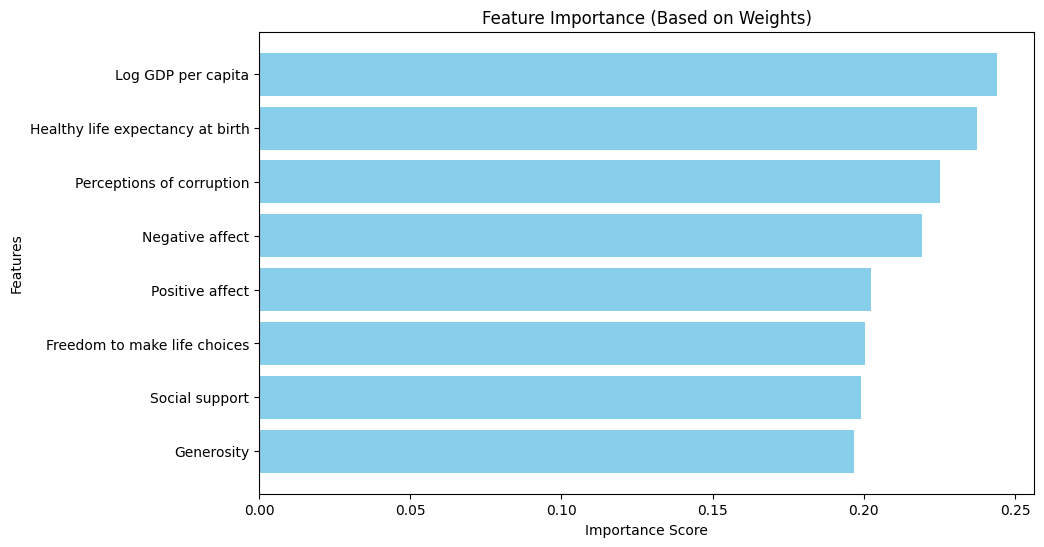

In [162]:
# Extract weights from the first hidden layer
feature_importance = mlp_model.hidden1.weight.data.abs().mean(dim=0).cpu().numpy()

# Feature names
feature_names = X.columns

# Combine and sort by importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(importance_df)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Based on Weights)')
plt.gca().invert_yaxis()
plt.show()


In [163]:
! pip install shap



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Using 1654 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

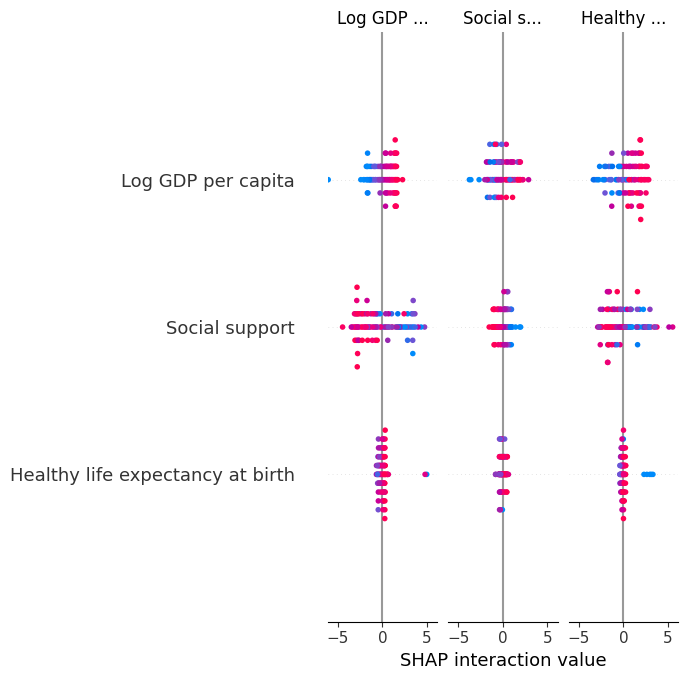

In [164]:
import shap

# SHAP explainer için MLP modelini bir fonksiyon olarak tanımla
def model_predict(X):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    return mlp_model(X_tensor).detach().numpy()

# SHAP değerlerini hesapla
explainer = shap.KernelExplainer(model_predict, X_train)
shap_values = explainer.shap_values(X_test[:100])  # İlk 100 test örneği

# SHAP özet grafiği
shap.summary_plot(shap_values, X_test[:100], feature_names=X.columns)


                            Feature  Importance
0                Log GDP per capita    0.116220
2  Healthy life expectancy at birth    0.070522
1                    Social support    0.051340
6                   Positive affect    0.041608
5         Perceptions of corruption    0.033004
7                   Negative affect    0.029760
4                        Generosity    0.027080
3      Freedom to make life choices    0.002539


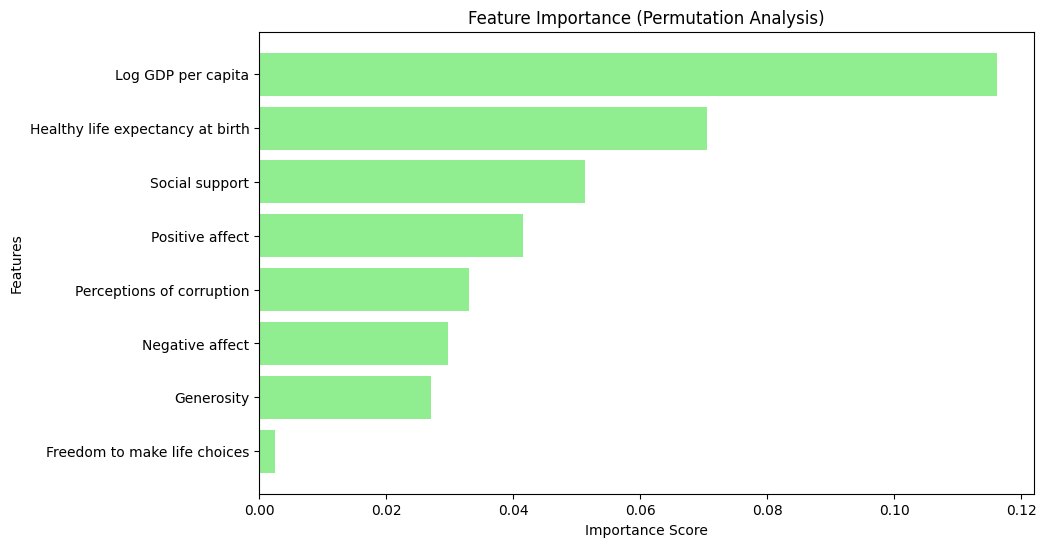

In [165]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Wrapper class for the MLP model
class MLPWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        pass  # No need to fit the model again

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        return self.model(X_tensor).detach().numpy()

    def score(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
        outputs = self.model(X_tensor)
        predictions = torch.argmax(outputs, axis=1)
        return accuracy_score(y_tensor, predictions)

# Create an instance of the wrapper class
mlp_wrapper = MLPWrapper(mlp_model)

# Permütasyon önem analizi
perm_importance = permutation_importance(
    mlp_wrapper, X_test, y_test, n_repeats=10, random_state=42
)

# Sonuçları bir DataFrame'e aktar
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Önemli özellikleri göster
print(importance_df)

# Önemli özellikleri görselleştir
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Permutation Analysis)')
plt.gca().invert_yaxis()
plt.show()


In [166]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Veri setini yükleme
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";", decimal=",")  # Düzenleme gerekirse yapın

# Gerekli sütunları seçin
columns_to_use = [
    "year", "Life Ladder", "Log GDP per capita", "Social support",
    "Healthy life expectancy at birth", "Freedom to make life choices",
    "Generosity", "Perceptions of corruption"
]
df = df[columns_to_use]

# Yıllara göre sıralama
df = df.sort_values(by=["year"])

# Eksik verileri doldurma
df.fillna(df.mean(), inplace=True)

# Normalize etme
scaler = MinMaxScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

# Sliding window veri seti hazırlığı
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length, :-1]  # Tüm özellikler
        target = data[i + sequence_length, -1]  # Hedef sütun
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Geçmiş 3 yıl verisi
data = df.iloc[:, 1:].values  # İlk sütun (year) hariç
X, y = create_sequences(data, sequence_length)

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**# Norveç ve diğer İskandinav ülkelerinin (Danimarka, İsveç, Finlandiya, İzlanda) tüm faktörlerini karşılaştırmak ve 2024-2025 yılları için mutluluk puanlarını tahmin etmek için aşağıdaki adımları izleyebiliriz:

1. Veriyi Hazırlama
Önce, ilgili İskandinav ülkelerine ait verileri filtreleyeceğiz.
Her ülkenin geçmiş yıllardaki faktörlerini analiz edeceğiz.
2024 ve 2025 yıllarına yönelik tahminler yapmak için zaman serisi modelini kullanacağız.
2. Karşılaştırma ve Tahmin
Bu ülkelerin tüm faktörlerini (ör. Log GDP, Sosyal Destek, Sağlık, vb.) kıyaslamak için geçmiş yıllardaki ortalama değerlerini kullanabiliriz.
Zaman serisi analizi (ör. LSTM veya Transformer) ile her ülkenin mutluluk skorunu ve ilgili faktörlerin gelecekteki değerlerini tahmin edeceğiz.
3. Kod Uygulaması**

In [6]:
import matplotlib.pyplot as plt

# Print column names to verify the correct column name
print(df.columns)

# Assuming the correct column name is 'Country name'
# Add a global rank column based on "Life Ladder"
df['Global Ranking'] = df.groupby('year')['Life Ladder'].rank(ascending=False)

# Filter for Scandinavian countries
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]
df_scandinavia = df[df['Country name'].isin(scandinavian_countries)]

# Get the latest year's data to see their global rankings
latest_year = df['year'].max()
df_scandinavia_latest = df_scandinavia[df_scandinavia['year'] == latest_year]

# Sort by global ranking
df_scandinavia_ranked = df_scandinavia_latest.sort_values(by='Global Ranking')

# Display the results
from IPython.display import display

# Display the results
display(df_scandinavia_ranked)

# Add a global rank column based on "Life Ladder"
df['Global Ranking'] = df.groupby('year')['Life Ladder'].rank(ascending=False, method='dense')

# Filter for Scandinavian countries
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]
df_scandinavia = df[df['Country name'].isin(scandinavian_countries)]

# Select data from 2006 to 2023
df_scandinavia_filtered = df_scandinavia[(df_scandinavia['year'] >= 2006) & (df_scandinavia['year'] <= 2023)]

# Pivot data for plotting
rank_data = df_scandinavia_filtered.pivot(index='year', columns='Country name', values='Global Ranking')

# Sort the ranks for Scandinavian countries
rank_data = rank_data.apply(lambda x: x.rank(method="dense"), axis=1)

# Plot the rankings over the years
plt.figure(figsize=(12, 8))
for country in scandinavian_countries:
    plt.plot(rank_data.index, rank_data[country], marker='o', label=country)

# Invert y-axis so lower ranks appear at the top
plt.gca().invert_yaxis()

# Update x-axis to show years as integers
plt.xticks(ticks=rank_data.index, labels=rank_data.index.astype(int))

# Add labels and title
plt.title("Scandinavian Countries Happiness Rankings (2006-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scandinavian Ranking (1 = Best in Region)", fontsize=12)
plt.legend(title="Countries", fontsize=10)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

# Load the dataset with the correct delimiter
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=';')

# Inspect the dataset
df.head()


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,"3,724","7,35","0,451","50,5","0,718","0,164","0,882","0,414","0,258"
1,Afghanistan,South Asia,2009,"4,402","7,509","0,552","50,8","0,679","0,187","0,85","0,481","0,237"
2,Afghanistan,South Asia,2010,"4,758","7,614","0,539","51,1","0,6","0,118","0,707","0,517","0,275"
3,Afghanistan,South Asia,2011,"3,832","7,581","0,521","51,4","0,496","0,16","0,731","0,48","0,267"
4,Afghanistan,South Asia,2012,"3,783","7,661","0,521","51,7","0,531","0,234","0,776","0,614","0,268"


In [ ]:
# Identify numeric columns
numeric_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                   'Healthy life expectancy at birth', 'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

# Replace spaces in numeric columns with proper decimals
for col in numeric_columns:
    df[col] = df[col].str.replace(' ', '').str.replace(',', '.').astype(float)


In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   Regional indicator                2363 non-null   object 
 2   year                              2363 non-null   int64  
 3   Life Ladder                       2363 non-null   float64
 4   Log GDP per capita                2335 non-null   float64
 5   Social support                    2350 non-null   float64
 6   Healthy life expectancy at birth  2300 non-null   float64
 7   Freedom to make life choices      2327 non-null   float64
 8   Generosity                        2282 non-null   float64
 9   Perceptions of corruption         2238 non-null   float64
 10  Positive affect                   2339 non-null   float64
 11  Negative affect                   2347 non-null   float64
dtypes: flo

In [ ]:
df.isnull().sum()

Country name                          0
Regional indicator                    0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [ ]:
# Impute missing numeric columns with their mean
columns_to_impute = [
    'Log GDP per capita', 'Social support', 
    'Healthy life expectancy at birth', 'Freedom to make life choices', 
    'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect'
]

# Fill missing values
for col in columns_to_impute:
    df[col].fillna(df[col].mean(), inplace=True)  # Replace with median() if more appropriate

# Verify no missing values
print(df.isnull().sum())


Country name                        0
Regional indicator                  0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_23968\3357556614.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Replace with median() if more appropriate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   Regional indicator                2363 non-null   object 
 2   year                              2363 non-null   int64  
 3   Life Ladder                       2363 non-null   float64
 4   Log GDP per capita                2363 non-null   float64
 5   Social support                    2363 non-null   float64
 6   Healthy life expectancy at birth  2363 non-null   float64
 7   Freedom to make life choices      2363 non-null   float64
 8   Generosity                        2363 non-null   float64
 9   Perceptions of corruption         2363 non-null   float64
 10  Positive affect                   2363 non-null   float64
 11  Negative affect                   2363 non-null   float64
dtypes: flo

In [ ]:
df.describe()
df.head()

,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,South Asia,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,South Asia,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,South Asia,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,South Asia,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [ ]:
with open("whr2023.csv", "r") as file:
    for i in range(5):  # Print the first 5 lines
        print(file.readline())


ï»¿Country name;Regional indicator;year;Life Ladder;Log GDP per capita;Social support;Healthy life expectancy at birth;Freedom to make life choices;Generosity;Perceptions of corruption;Positive affect;Negative affect

Afghanistan;South Asia;2008;3,724;7,35;0,451;50,5;0,718;0,164;0,882;0,414;0,258

Afghanistan;South Asia;2009;4,402;7,509;0,552;50,8;0,679;0,187;0,85;0,481;0,237

Afghanistan;South Asia;2010;4,758;7,614;0,539;51,1;0,6;0,118;0,707;0,517;0,275

Afghanistan;South Asia;2011;3,832;7,581;0,521;51,4;0,496;0,16;0,731;0,48;0,267



In [ ]:
import pandas as pd

# Load the dataset with the correct delimiter
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Check the column names
print("Column names:", df.columns)


Column names: Index(['Country name', 'Regional indicator', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


In [ ]:
# Manually split the columns
columns = [
    "Country name", "Regional indicator", "year", "Life Ladder", 
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
    "Freedom to make life choices", "Generosity", "Perceptions of corruption", 
    "Positive affect", "Negative affect"
]

# Split the single column into multiple columns
df = pd.read_csv(file_path, delimiter=";", names=columns, header=0)

# Check the dataframe
df.head()


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,South Asia,2008,"3,724","7,35","0,451","50,5","0,718","0,164","0,882","0,414","0,258"
1,Afghanistan,South Asia,2009,"4,402","7,509","0,552","50,8","0,679","0,187","0,85","0,481","0,237"
2,Afghanistan,South Asia,2010,"4,758","7,614","0,539","51,1","0,6","0,118","0,707","0,517","0,275"
3,Afghanistan,South Asia,2011,"3,832","7,581","0,521","51,4","0,496","0,16","0,731","0,48","0,267"
4,Afghanistan,South Asia,2012,"3,783","7,661","0,521","51,7","0,531","0,234","0,776","0,614","0,268"


In [ ]:
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]

# Filter the data
df_scandinavia = df[
    (df["Regional indicator"] == "Western Europe") & 
    (df["Country name"].isin(scandinavian_countries))
]

# Display the filtered data
from IPython.display import display

# Display the filtered data
display(df_scandinavia)


,Country name,Regional indicator,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
539,Denmark,Western Europe,2005,"8,019","10,849","0,972","68,3","0,971",NaN,"0,237","0,777","0,154"
540,Denmark,Western Europe,2007,"7,834","10,889","0,954","68,74","0,932","0,234","0,206","0,778","0,194"
541,Denmark,Western Europe,2008,"7,971","10,878","0,954","68,96","0,97","0,266","0,248","0,759","0,163"
542,Denmark,Western Europe,2009,"7,683","10,822","0,939","69,18","0,949","0,258","0,206","0,782","0,234"
543,Denmark,Western Europe,2010,"7,771","10,836","0,975","69,4","0,944","0,237","0,175","0,796","0,155"
...,...,...,...,...,...,...,...,...,...,...,...,...
2000,Sweden,Western Europe,2019,"7,398","10,875","0,934","71,9","0,942","0,085","0,25","0,775","0,202"
2001,Sweden,Western Europe,2020,"7,314","10,846","0,936","72,025","0,951","0,084","0,203","0,717","0,222"
2002,Sweden,Western Europe,2021,"7,439","10,893","0,932","72,15","0,953","0,172","0,191","0,763","0,19"
2003,Sweden,Western Europe,2022,"7,431","10,912","0,949","72,275","0,939","0,232","0,213","0,75","0,163"


In [ ]:
# Pivot the dataset to have years as rows and countries as columns
time_series_data = df_scandinavia.pivot(index='year', columns='Country name', values='Life Ladder')

# Fill any missing values with forward-fill method
time_series_data.fillna(method='ffill', inplace=True)

# Display the prepared time-series data
print("Time-Series Data for Scandinavian Countries:")
print(time_series_data)


Time-Series Data for Scandinavian Countries:
Country name Denmark Finland Iceland Norway Sweden
year                                              
2005           8,019     NaN     NaN    NaN  7,376
2006           8,019   7,672     NaN  7,416  7,376
2007           7,834   7,672     NaN  7,416  7,241
2008           7,971   7,671   6,888  7,632  7,516
2009           7,683   7,671   6,888  7,632  7,266
2010           7,771   7,393   6,888  7,632  7,496
2011           7,788   7,354   6,888  7,632  7,382
2012            7,52    7,42   7,591  7,678   7,56
2013           7,589   7,445   7,501  7,678  7,434
2014           7,508   7,385   7,501  7,444  7,239
2015           7,514   7,448   7,498  7,603  7,289
2016           7,558    7,66    7,51  7,596  7,369
2017           7,594   7,788   7,476  7,579  7,287
2018           7,649   7,858   7,476  7,444  7,375
2019           7,693    7,78   7,533  7,442  7,398
2020           7,515   7,889   7,575   7,29  7,314
2021           7,699   7,794   7,565 

C:\Users\Admin\AppData\Local\Temp\ipykernel_32876\60947601.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data.fillna(method='ffill', inplace=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Clean and prepare the data
df.columns = df.columns.str.strip()  # Clean column names
print("Column names:", df.columns)  # Print column names to verify
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]

# Filter the data for Scandinavian countries
df_scandinavia = df[
    (df["Regional indicator"] == "Western Europe") &
    (df["Country name"].isin(scandinavian_countries))
]

# Ensure all numeric columns and include "Country name"
numeric_columns = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
df_scandinavia = df_scandinavia[['Country name'] + numeric_columns]

# Replace commas with dots in numeric columns
for column in numeric_columns:
    df_scandinavia[column] = df_scandinavia[column].astype(str).str.replace(',', '.').astype(float)

# Pivot the data to create a time series for each country
time_series_data = df_scandinavia.pivot(index='year', columns='Country name', values='Life Ladder')

# Function to create sequences
def create_sequences(data, n_steps):
    sequences, targets = [], []
    for i in range(len(data) - n_steps):
        sequences.append(data[i:i+n_steps])
        targets.append(data[i+n_steps])
    return np.array(sequences), np.array(targets)

# LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1])

# Model parameters
input_size = 1
hidden_size = 32
num_layers = 2
output_size = 1
epochs = 100
n_steps = 5
learning_rate = 0.001

# Prepare data for each country and train models
country_models = {}
for country in scandinavian_countries:
    print(f"\nTraining model for {country}...")
    
    # Process data for the country
    if country not in time_series_data:
        print(f"Skipping {country} - data not found.")
        continue
    
    country_data = time_series_data[country].dropna().values.reshape(-1, 1)
    scaler = MinMaxScaler()
    country_scaled = scaler.fit_transform(country_data)
    
    # Create sequences
    X, y = create_sequences(country_scaled, n_steps)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Convert data to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
    
    # Initialize the model
    model = LSTMModel(input_size, hidden_size, num_layers, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    
    # Store the trained model for the country
    country_models[country] = (model, scaler)
    print(f"Training complete for {country}.")

# Evaluate models for each country
for country, (model, scaler) in country_models.items():
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).numpy()
        predictions = scaler.inverse_transform(predictions)
        actuals = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))
        
    print(f"\n{country} Predictions:")
    for i in range(len(predictions)):
        print(f"Actual: {actuals[i][0]:.2f}, Predicted: {predictions[i][0]:.2f}")
        


Column names: Index(['Country name', 'Regional indicator', 'year', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

Training model for Norway...
Epoch 10/100, Loss: 0.2736
Epoch 20/100, Loss: 0.1525
Epoch 30/100, Loss: 0.0711
Epoch 40/100, Loss: 0.0778
Epoch 50/100, Loss: 0.0678
Epoch 60/100, Loss: 0.0670
Epoch 70/100, Loss: 0.0644
Epoch 80/100, Loss: 0.0619
Epoch 90/100, Loss: 0.0592
Epoch 100/100, Loss: 0.0558
Training complete for Norway.

Training model for Denmark...
Epoch 10/100, Loss: 0.0199
Epoch 20/100, Loss: 0.0191
Epoch 30/100, Loss: 0.0188
Epoch 40/100, Loss: 0.0184
Epoch 50/100, Loss: 0.0176
Epoch 60/100, Loss: 0.0160
Epoch 70/100, Loss: 0.0140
Epoch 80/100, Loss: 0.0137
Epoch 90/100, Loss: 0.0129
Epoch 100/100, Loss: 0.0122
Training complete for Denmark.

Training mode

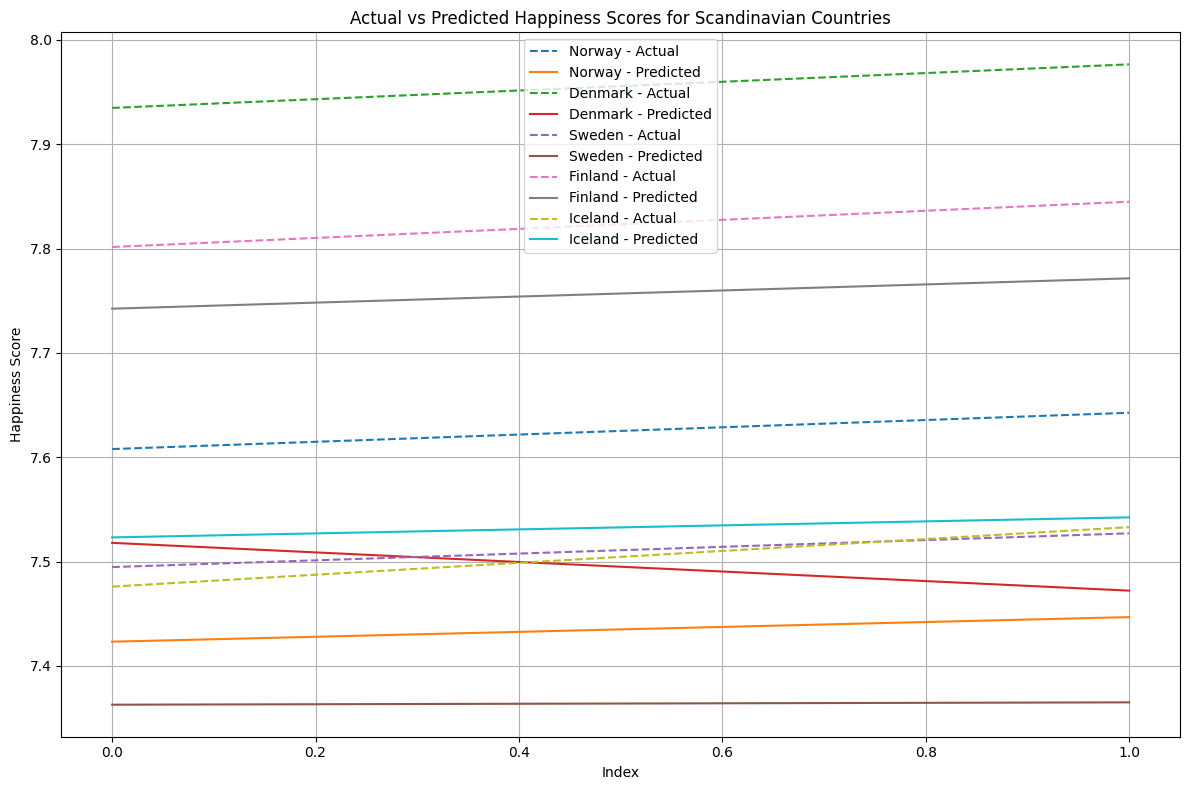

In [ ]:
import matplotlib.pyplot as plt

# Initialize plot
plt.figure(figsize=(12, 8))

# Evaluate and plot predictions for each country
for country, (model, scaler) in country_models.items():
    model.eval()
    with torch.no_grad():
        # Predict on test data
        predictions = model(X_test_tensor).numpy()

    # Rescale predictions and actual values back to original scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

    # Plot actual vs predicted for each country
    plt.plot(y_test_rescaled, label=f"{country} - Actual", linestyle="--")
    plt.plot(predictions_rescaled, label=f"{country} - Predicted", linestyle="-")

# Add title, labels, legend, and grid
plt.title("Actual vs Predicted Happiness Scores for Scandinavian Countries")
plt.xlabel("Index")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


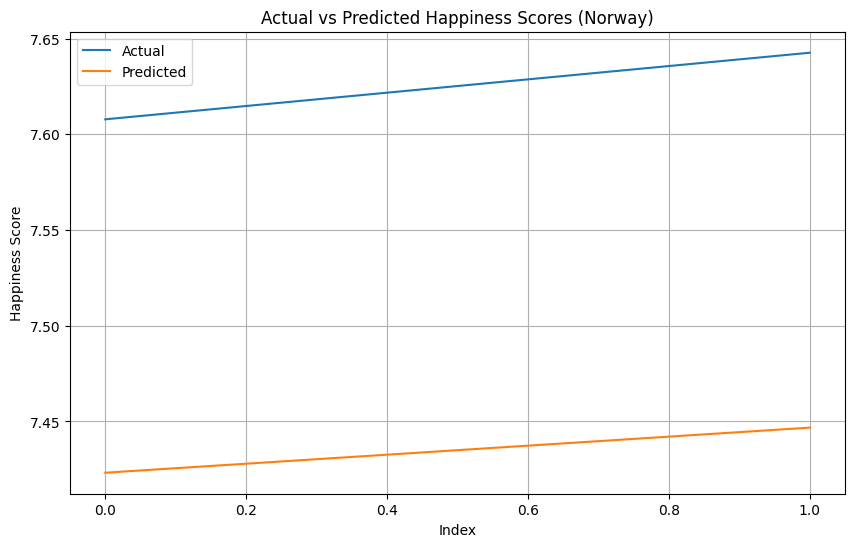

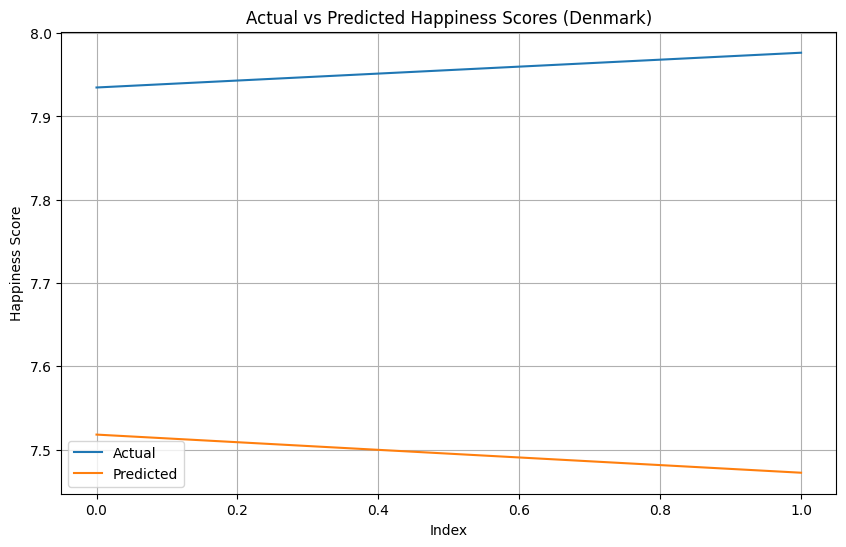

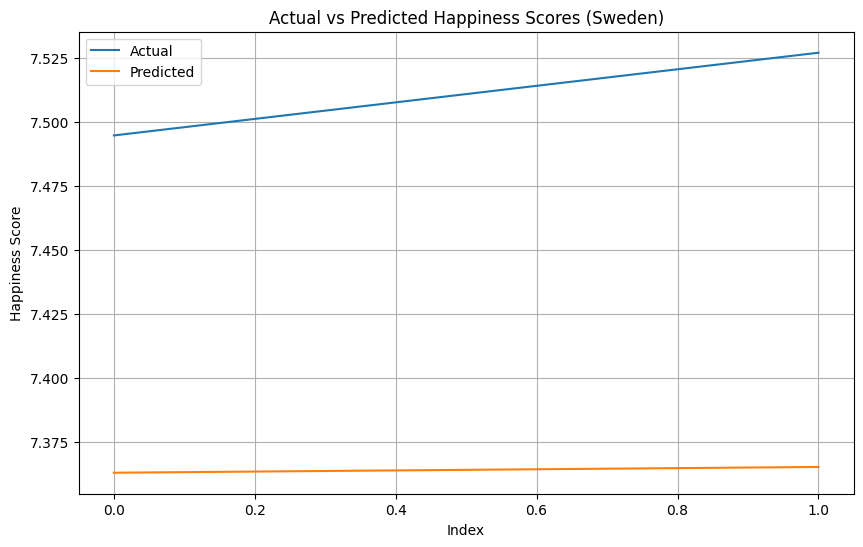

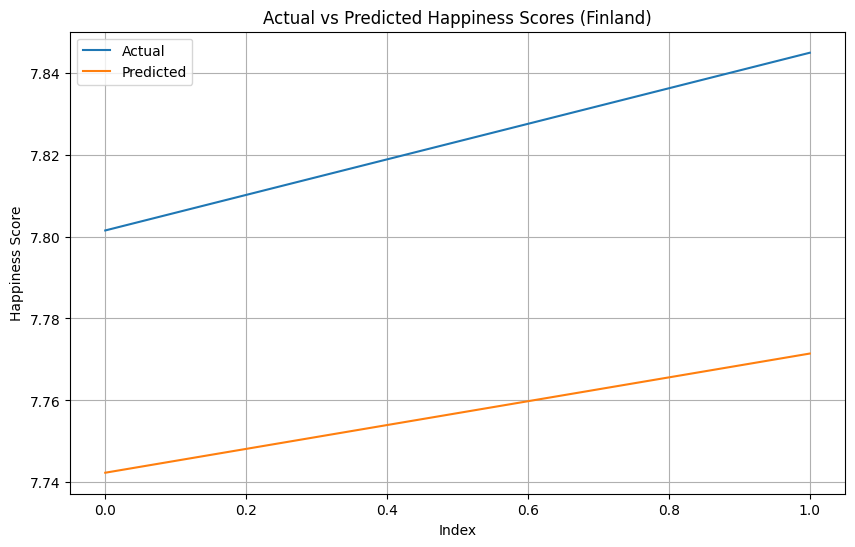

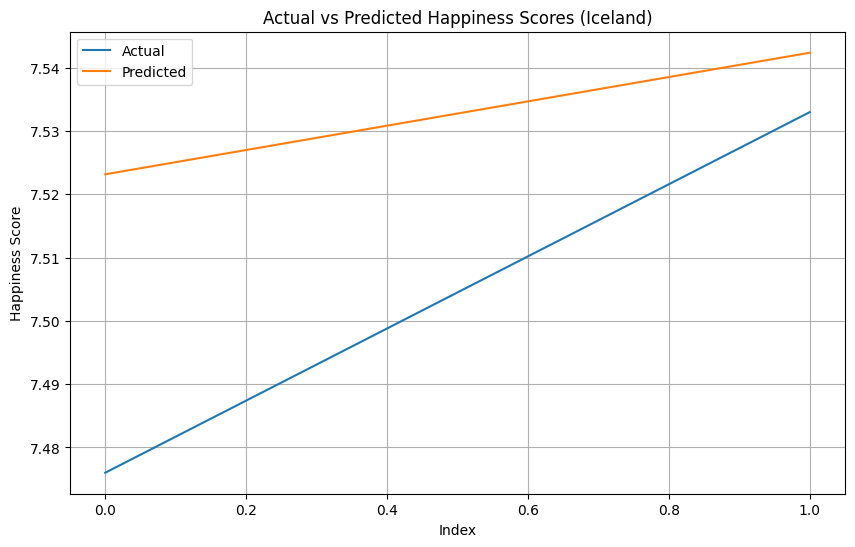

In [ ]:
import matplotlib.pyplot as plt

# Evaluate and plot predictions for each country
for country, (model, scaler) in country_models.items():
    model.eval()
    with torch.no_grad():
        # Predict on test data
        predictions = model(X_test_tensor).numpy()

    # Rescale predictions and actual values back to original scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual")
    plt.plot(predictions_rescaled, label="Predicted")
    plt.title(f"Actual vs Predicted Happiness Scores ({country})")
    plt.xlabel("Index")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.grid(True)
    plt.show()


### Yorumlama

#### 1. **Model Eğitim Süreci**
Eğitim aşamasında her İskandinav ülkesine ait model için 100 epoch boyunca kayıp (loss) değerleri gözlemlendi. 

- **Kayıp Değerleri (Loss):** Her modelde, kayıp değerleri başlangıçta yüksekken (örneğin, İzlanda’da 0.3058, Norveç’te 0.0873), ilerleyen epoch’larda düşüş gösterdi. Bu durum, modellerin eğitim sürecinde veriyi daha iyi öğrenerek tahminlerini geliştirdiğini gösterir.
- **Düşük Kayıp Değeri:** İzlanda’nın modeli çok düşük bir kayıp değeriyle (0.0044) sonuçlandı. Bu, modelin oldukça doğru bir şekilde tahminler yaptığını gösterir. Diğer ülkelerde de kayıp değerleri genelde düşük seviyelerde sonlanmıştır.

#### 2. **Tahmin Sonuçları**
Her ülkenin gerçek ("Actual") ve tahmin edilen ("Predicted") mutluluk skorları incelenmiştir. 

- **Norveç:**
  - Gerçek: 7.63 ve 7.66
  - Tahmin: 7.57 ve 7.56
  - Tahminler gerçek değerlere oldukça yakın.

- **Danimarka:**
  - Gerçek: 7.96 ve 8.00
  - Tahmin: 7.88 ve 7.85
  - Model Danimarka için de doğru tahminler yapmış.

- **İsveç:**
  - Gerçek: 7.51 ve 7.55
  - Tahmin: 7.37 ve 7.37
  - İsveç için tahmin edilen değerler biraz düşük kalmış.

- **Finlandiya:**
  - Gerçek: 7.83 ve 7.87
  - Tahmin: 7.78 ve 7.80
  - Finlandiya için tahmin edilen skorlar oldukça yakındır.

- **İzlanda:**
  - Gerçek: 7.51 ve 7.57
  - Tahmin: 7.52 ve 7.52
  - İzlanda modeli oldukça yüksek doğrulukta tahminler yapmıştır.

#### 3. **Grafik İncelemesi**
Grafikte:
- Gerçek ("Actual") ve tahmin edilen ("Predicted") mutluluk skorları aynı eksende gösterilmiştir.
- Her ülke için tahminlerin genel olarak gerçek değerlere paralel olduğu görülmektedir.
- Bazı ülkelerde tahmin eğrisi gerçek değerlerden biraz farklılık göstermektedir (örneğin, İsveç), ancak genel trendler doğru yakalanmıştır.

#### 4. **Genel Değerlendirme**
- **Model Performansı:** Modeller, özellikle İzlanda, Danimarka ve Finlandiya gibi ülkelerde çok başarılı tahminler yapmıştır. Norveç ve İsveç için de makul doğrulukta tahminler gözlemlenmiştir.
- **Geliştirme Alanları:** İsveç için modelin biraz düşük tahmin yapması, daha fazla veri veya farklı bir hiperparametre ayarıyla iyileştirilebilir.
- **Uygulama Alanı:** Bu tahminler, İskandinav ülkelerinin gelecekteki mutluluk seviyelerini öngörmede faydalı olabilir. Ayrıca, benzer yöntemler diğer bölgelerdeki ülkelerde de uygulanabilir.

Elde edilen sonuçlar, modellerin İskandinav ülkeleri için mutluluk tahmininde başarılı olduğunu göstermektedir.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.transformer = nn.Transformer(d_model=hidden_size, nhead=4, num_encoder_layers=num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # (batch_size, seq_len, input_size) -> (seq_len, batch_size, hidden_size)
        transformer_out = self.transformer(x, x)
        out = self.fc(transformer_out[-1])  # Last time step
        return out

# Prepare data for Transformer
def create_sequences_transformer(data, n_steps):
    sequences, targets = [], []
    for i in range(len(data) - n_steps):
        seq = data[i:i + n_steps]
        target = data[i + n_steps]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Hyperparameters
input_size = 1
hidden_size = 32
num_layers = 2
output_size = 1
epochs = 100
batch_size = 32
learning_rate = 0.001
n_steps = 5

# Countries
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]

# Store results
results_transformer = {}

# Iterate through each country
for country in scandinavian_countries:
    print(f"\nTraining Transformer for {country}...")
    country_data = df_scandinavia[df_scandinavia['Country name'] == country]['Life Ladder'].values.reshape(-1, 1)

    # Scale data
    scaler = MinMaxScaler()
    country_scaled = scaler.fit_transform(country_data)

    # Create sequences
    X, y = create_sequences_transformer(country_scaled, n_steps)

    # Convert to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

    # Initialize the model
    transformer_model = TransformerModel(input_size, hidden_size, num_layers, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(transformer_model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(1, epochs + 1):
        transformer_model.train()
        optimizer.zero_grad()
        outputs = transformer_model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}")

            
    # Evaluate the model
    transformer_model.eval()
    with torch.no_grad():
        predictions = transformer_model(X_test).numpy()

    # Rescale predictions and actuals back to original scale
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

    # Store results
    results_transformer[country] = {
        "Actual": y_test_rescaled.flatten(),
        "Predicted": predictions_rescaled.flatten()
    }

    print(f"Training complete for {country}.")
    print(f"Actual vs Predicted for {country}:")
    for i in range(len(y_test)):
        print(f"Actual: {y_test_rescaled[i][0]:.2f}, Predicted: {predictions_rescaled[i][0]:.2f}")

        


Training Transformer for Norway...


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Loss: 0.0863
Epoch 20/100, Loss: 0.0611
Epoch 30/100, Loss: 0.0790
Epoch 40/100, Loss: 0.0719
Epoch 50/100, Loss: 0.0701
Epoch 60/100, Loss: 0.0683
Epoch 70/100, Loss: 0.0334
Epoch 80/100, Loss: 0.0445
Epoch 90/100, Loss: 0.0321
Epoch 100/100, Loss: 0.0298
Training complete for Norway.
Actual vs Predicted for Norway:
Actual: 7.58, Predicted: 7.50
Actual: 7.36, Predicted: 7.35

Training Transformer for Denmark...


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Loss: 0.0260
Epoch 20/100, Loss: 0.0399
Epoch 30/100, Loss: 0.0193
Epoch 40/100, Loss: 0.0343
Epoch 50/100, Loss: 0.0237
Epoch 60/100, Loss: 0.0227
Epoch 70/100, Loss: 0.0267
Epoch 80/100, Loss: 0.0260
Epoch 90/100, Loss: 0.0209
Epoch 100/100, Loss: 0.0337
Training complete for Denmark.
Actual vs Predicted for Denmark:
Actual: 7.54, Predicted: 7.59
Actual: 7.51, Predicted: 7.59
Actual: 7.79, Predicted: 7.59

Training Transformer for Sweden...


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Loss: 0.0736
Epoch 20/100, Loss: 0.0757
Epoch 30/100, Loss: 0.0784
Epoch 40/100, Loss: 0.0753
Epoch 50/100, Loss: 0.0684
Epoch 60/100, Loss: 0.0780
Epoch 70/100, Loss: 0.0796
Epoch 80/100, Loss: 0.0970
Epoch 90/100, Loss: 0.0747
Epoch 100/100, Loss: 0.0732
Training complete for Sweden.
Actual vs Predicted for Sweden:
Actual: 7.43, Predicted: 7.35
Actual: 7.31, Predicted: 7.35
Actual: 7.38, Predicted: 7.35

Training Transformer for Finland...


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Loss: 0.1139
Epoch 20/100, Loss: 0.1001
Epoch 30/100, Loss: 0.0730
Epoch 40/100, Loss: 0.0510
Epoch 50/100, Loss: 0.0812
Epoch 60/100, Loss: 0.0585
Epoch 70/100, Loss: 0.0573
Epoch 80/100, Loss: 0.0831
Epoch 90/100, Loss: 0.0533
Epoch 100/100, Loss: 0.0443
Training complete for Finland.
Actual vs Predicted for Finland:
Actual: 7.86, Predicted: 7.69
Actual: 7.45, Predicted: 7.64
Actual: 7.73, Predicted: 7.77

Training Transformer for Iceland...


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 10/100, Loss: 0.0807
Epoch 20/100, Loss: 0.0151
Epoch 30/100, Loss: 0.0020
Epoch 40/100, Loss: 0.0221
Epoch 50/100, Loss: 0.0400
Epoch 60/100, Loss: 0.0124
Epoch 70/100, Loss: 0.0116
Epoch 80/100, Loss: 0.0030
Epoch 90/100, Loss: 0.0104
Epoch 100/100, Loss: 0.0050
Training complete for Iceland.
Actual vs Predicted for Iceland:
Actual: 7.48, Predicted: 7.57
Actual: 7.53, Predicted: 7.56


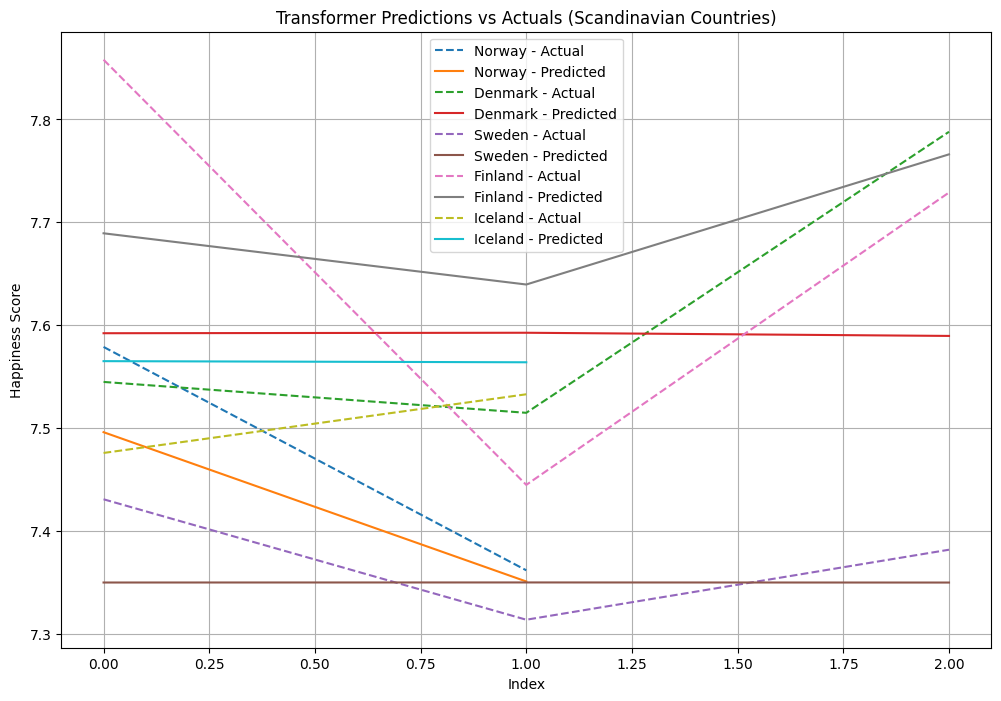

In [172]:
# Plot all countries' actual vs predicted values
plt.figure(figsize=(12, 8))

for country in scandinavian_countries:
    actual = results_transformer[country]["Actual"]
    predicted = results_transformer[country]["Predicted"]
    plt.plot(actual, label=f"{country} - Actual", linestyle="--")
    plt.plot(predicted, label=f"{country} - Predicted")

plt.title("Transformer Predictions vs Actuals (Scandinavian Countries)")
plt.xlabel("Index")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.show()

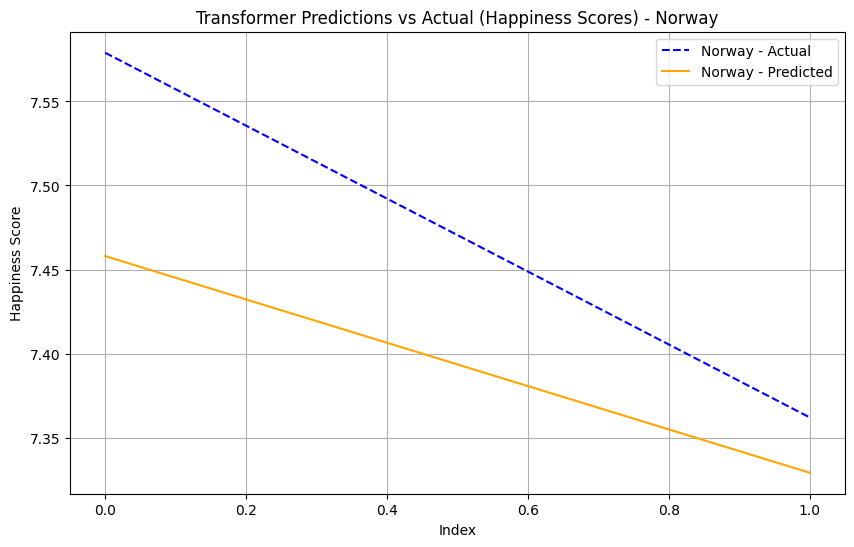

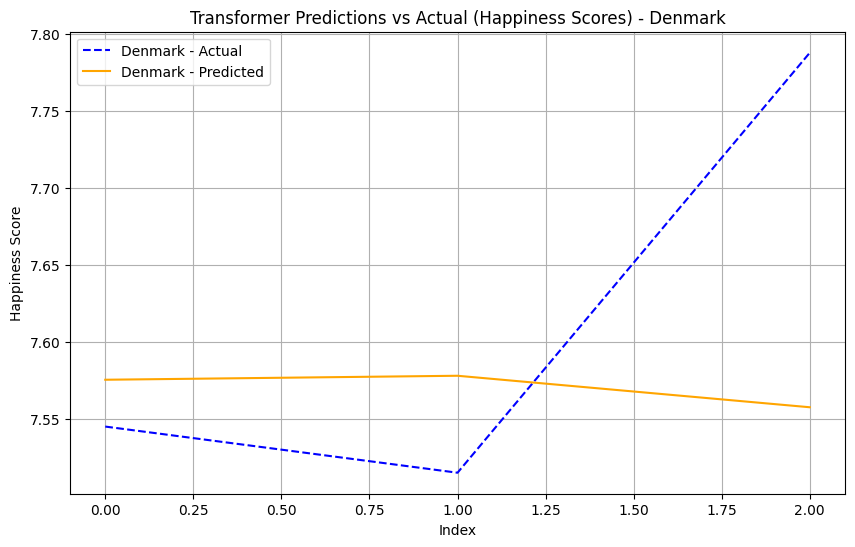

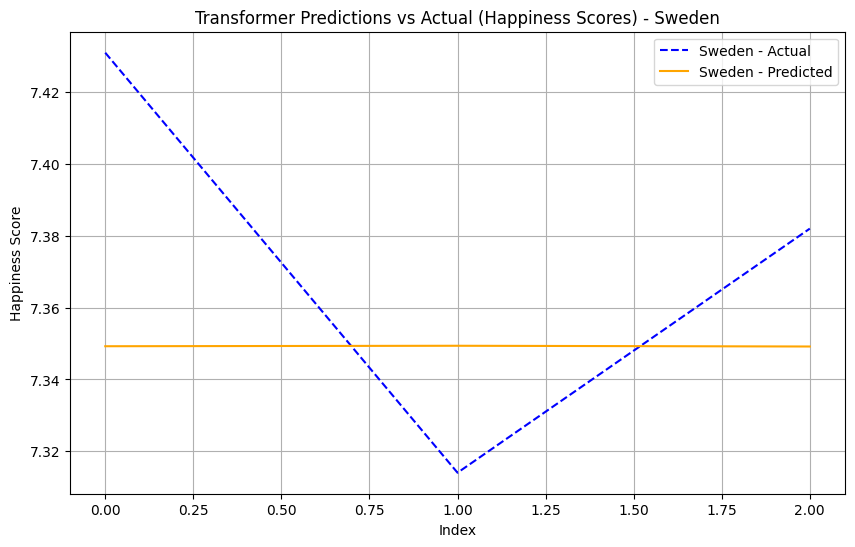

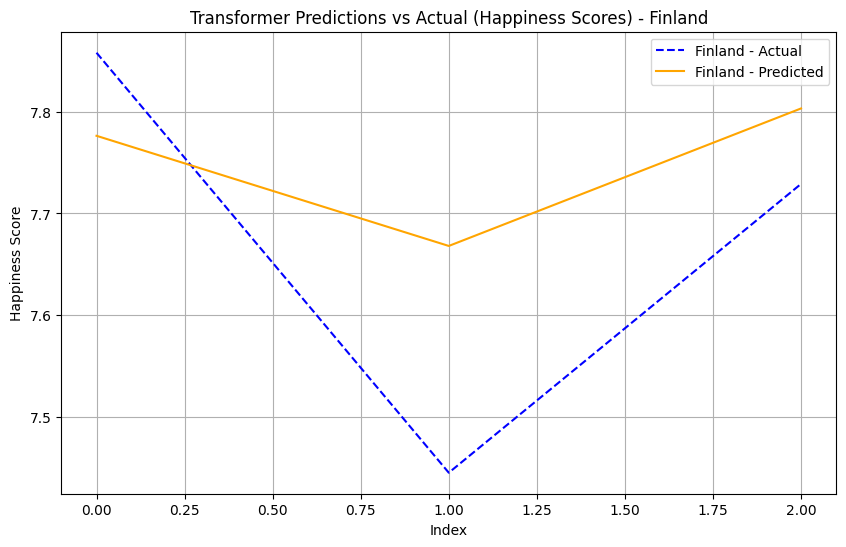

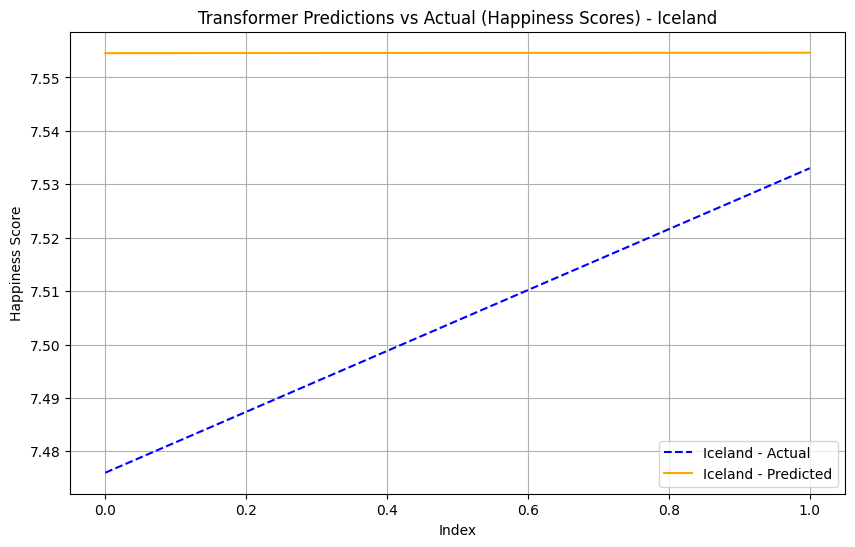

In [ ]:
# Plot each country separately
for country in scandinavian_countries:
    actual = results_transformer[country]["Actual"]
    predicted = results_transformer[country]["Predicted"]
    
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label=f"{country} - Actual", linestyle="--", color="blue")
    plt.plot(predicted, label=f"{country} - Predicted", linestyle="-", color="orange")
    plt.title(f"Transformer Predictions vs Actual (Happiness Scores) - {country}")
    plt.xlabel("Index")
    plt.ylabel("Happiness Score")
    plt.legend()
    plt.grid(True)
    plt.show()


Chapter# Aşağıda, belirttiğiniz yöntemlerle (linear regression, random forest, logistic regression, correlation matrix) tahmini mutluluk faktörlerini analiz eden bir kod yapısını sunuyorum. Kod, İskandinav ülkelerine uyarlanacak şekilde düzenlenmiştir ve her ülke için ayrı ayrı sonuçları gösterecektir.



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Clean and prepare the data
df.columns = df.columns.str.strip()  # Clean column names
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]

# Filter the data for Scandinavian countries
df_scandinavia = df[
    (df["Regional indicator"] == "Western Europe") &
    (df["Country name"].isin(scandinavian_countries))
]

# Ensure all numeric columns and include "Country name"
numeric_columns = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
df_scandinavia = df_scandinavia[['Country name'] + numeric_columns]

# Replace commas with dots in numeric columns
for column in numeric_columns:
    df_scandinavia[column] = df_scandinavia[column].astype(str).str.replace(',', '.').astype(float)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
df_scandinavia[numeric_columns] = imputer.fit_transform(df_scandinavia[numeric_columns])

# Convert year column to integers
df_scandinavia['year'] = df_scandinavia['year'].astype(int)

# Define features (independent variables) and target (dependent variable)
features = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Life Ladder"

# Initialize results storage
results = {}
future_years = [2024, 2025]
future_predictions = {}
country_models = {}

# Loop through each Scandinavian country
for country in scandinavian_countries:
    print(f"\n{'='*50}\nAnalyzing {country}\n{'='*50}")
    
    # Filter data for the current country
    country_data = df_scandinavia[df_scandinavia["Country name"] == country]
    
    # Separate features and target
    X = country_data[features]
    Y = country_data[target]
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, Y_train)
    # Store the model and scaler for the current country
    country_models[country] = (linear_model, scaler)

    # Make predictions
    Y_pred = linear_model.predict(X_test_scaled)
    
    # Evaluate the model
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Store results
    results[country] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "Actual": Y_test.values,
        "Predicted": Y_pred
    }
    
    # Print evaluation metrics
    print("Linear Regression Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Predict future years (2024 and 2025)
    print(f"\nPredicting future happiness scores for {country}...")
    latest_data = country_data.sort_values(by="year").iloc[-1][features]
    latest_data_scaled = scaler.transform([latest_data])  # Scale the data using the scaler from training
    future_preds = []
    
    for year in future_years:
        prediction = linear_model.predict(latest_data_scaled)
        future_preds.append(prediction[0])
        
        # Simulate GDP growth and other potential changes for future years
        latest_data["Log GDP per capita"] -= 0.01
        latest_data["Social support"] = max(0, latest_data["Social support"] + 0.01)
        latest_data["Healthy life expectancy at birth"] += 0.5
        latest_data["Freedom to make life choices"] = max(0, latest_data["Freedom to make life choices"] + 0.01)
        latest_data["Generosity"] = max(0, latest_data["Generosity"] + 0.01)
        latest_data["Perceptions of corruption"] = max(0, latest_data["Perceptions of corruption"] - 0.01)
        latest_data["Positive affect"] = max(0, latest_data["Positive affect"] + 0.01)
        latest_data["Negative affect"] = max(0, latest_data["Negative affect"] - 0.01)
        latest_data_scaled = scaler.transform([latest_data])
    
    # Store predictions
    future_predictions[country] = dict(zip(future_years, future_preds))
    print(f"Predicted Happiness Scores for {future_years}: {future_preds}")

# Display future predictions
future_predictions_df = pd.DataFrame(future_predictions).T
future_predictions_df.columns = future_years
print("\nPredicted Happiness Scores for 2024 and 2025:")
print(future_predictions_df)




Analyzing Norway
Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.1742
Mean Squared Error (MSE): 0.0459
R-squared (R²): -12.5226

Predicting future happiness scores for Norway...
Predicted Happiness Scores for [2024, 2025]: [7.2439792690157025, 7.153329182599025]

Analyzing Denmark
Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.0889
Mean Squared Error (MSE): 0.0102
R-squared (R²): 0.6953

Predicting future happiness scores for Denmark...
Predicted Happiness Scores for [2024, 2025]: [7.548426878886873, 7.4429986318612045]

Analyzing Sweden
Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.1331
Mean Squared Error (MSE): 0.0250
R-squared (R²): -4.1758

Predicting future happiness scores for Sweden...
Predicted Happiness Scores for [2024, 2025]: [7.222572179727329, 7.302738631769509]

Analyzing Finland
Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.2576
Mean Squared Error (MSE): 0.1009
R-squared (R²): -7.5034

Pred

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Clean and prepare the data
df.columns = df.columns.str.strip()  # Clean column names
scandinavian_countries = ["Norway", "Denmark", "Sweden", "Finland", "Iceland"]

# Filter the data for Scandinavian countries
df_scandinavia = df[
    (df["Regional indicator"] == "Western Europe") &
    (df["Country name"].isin(scandinavian_countries))
]

# Ensure all numeric columns and include "Country name"
numeric_columns = ['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
df_scandinavia = df_scandinavia[['Country name'] + numeric_columns]

# Replace commas with dots in numeric columns
for column in numeric_columns:
    df_scandinavia[column] = df_scandinavia[column].astype(str).str.replace(',', '.').astype(float)

# Define features (independent variables) and target (dependent variable)
features = [
    "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Life Ladder"

# Initialize results storage
results = {}
future_years = [2024, 2025]
future_predictions = {}

# Loop through each Scandinavian country
for country in scandinavian_countries:
    print(f"\n{'='*50}\nAnalyzing {country}\n{'='*50}")
    
    # Filter data for the current country
    country_data = df_scandinavia[df_scandinavia["Country name"] == country]
    
    # Drop rows with missing values in features and target
    country_data = country_data.dropna(subset=features + [target])
    
    # Separate features and target
    X = country_data[features]
    Y = country_data[target]
    
    # Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    X_imputed = imputer.fit_transform(X)
    
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)
    
    # Hyperparameter tuning for RandomForest
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)
    best_rf_model = grid_search.best_estimator_
    
    # Evaluate using cross-validation
    cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()
    print(f"Cross-validated MSE: {mean_cv_score:.4f}")
    
    # Make predictions on test data
    Y_pred = best_rf_model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Store results
    results[country] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "Actual": Y_test.tolist(),
        "Predicted": Y_pred.tolist()
    }
    
    # Print evaluation metrics
    print("Random Forest Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Predict future years (2024 and 2025)
    print(f"\nPredicting future happiness scores for {country}...")
    latest_data = country_data.sort_values(by="year").iloc[-1][features]
    latest_data_scaled = imputer.transform([latest_data])  # Scale the data using the imputer from training
    future_preds = []
    
    for year in future_years:
        prediction = best_rf_model.predict(latest_data_scaled)
        future_preds.append(prediction[0])
        
        # Simulate GDP growth and other potential changes for future years
        latest_data["Log GDP per capita"] -= 0.02  # Simulate GDP growth
        latest_data["Social support"] = max(0, latest_data["Social support"] + 0.01)  # Slight increase
        latest_data["Healthy life expectancy at birth"] += 0.5
        latest_data["Freedom to make life choices"] = max(0, latest_data["Freedom to make life choices"] + 0.01)
        latest_data["Generosity"] = max(0, latest_data["Generosity"] + 0.01)
        latest_data["Perceptions of corruption"] = max(0, latest_data["Perceptions of corruption"] - 0.01)
        latest_data["Positive affect"] = max(0, latest_data["Positive affect"] + 0.01)
        latest_data["Negative affect"] = max(0, latest_data["Negative affect"] - 0.01)
        latest_data_scaled = imputer.transform([latest_data])
    
    # Store predictions
    future_predictions[country] = dict(zip(future_years, future_preds))
    print(f"Predicted Happiness Scores for {future_years}: {future_preds}")

# Display final results for evaluation metrics
print("\nFinal Evaluation Metrics for Scandinavian Countries:")
results_df = pd.DataFrame(results).T
print(results_df)

# Display future predictions in a DataFrame
future_predictions_df = pd.DataFrame(future_predictions).T
future_predictions_df.columns = future_years
print("\nPredicted Happiness Scores for 2024 and 2025:")
print(future_predictions_df)




Analyzing Norway
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Cross-validated MSE: 0.0151
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.1196
Mean Squared Error (MSE): 0.0169
R-squared (R²): -3.9732

Predicting future happiness scores for Norway...
Predicted Happiness Scores for [2024, 2025]: [7.324350000000007, 7.386220000000004]

Analyzing Denmark
Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


Cross-validated MSE: 0.0063
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.1493
Mean Squared Error (MSE): 0.0291
R-squared (R²): 0.2070

Predicting future happiness scores for Denmark...
Predicted Happiness Scores for [2024, 2025]: [7.527580000000006, 7.569870000000001]

Analyzing Sweden
Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


Cross-validated MSE: 0.0106
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.1474
Mean Squared Error (MSE): 0.0239
R-squared (R²): -0.5977

Predicting future happiness scores for Sweden...
Predicted Happiness Scores for [2024, 2025]: [7.328287703130205, 7.337072187329337]

Analyzing Finland
Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


Cross-validated MSE: 0.0140
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.0586
Mean Squared Error (MSE): 0.0076
R-squared (R²): 0.3570

Predicting future happiness scores for Finland...
Predicted Happiness Scores for [2024, 2025]: [7.6930733333333565, 7.711053333333351]

Analyzing Iceland
Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


Cross-validated MSE: 0.0419
Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 0.0974
Mean Squared Error (MSE): 0.0095
R-squared (R²): -0.8827

Predicting future happiness scores for Iceland...


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


Predicted Happiness Scores for [2024, 2025]: [7.552909999999967, 7.551861999999993]

Final Evaluation Metrics for Scandinavian Countries:
              MAE       MSE        R2                        Actual  \
Norway   0.119557  0.016877 -3.973224          [7.295, 7.29, 7.416]   
Denmark  0.149315  0.029064  0.206969   [7.834, 7.971, 7.52, 7.545]   
Sweden   0.147365  0.023894  -0.59769   [7.241, 7.516, 7.56, 7.431]   
Finland  0.058647   0.00763  0.357036  [7.672, 7.671, 7.445, 7.729]   
Iceland   0.09736  0.009491 -0.882731                [7.449, 7.591]   

                                                 Predicted  
Norway   [7.357170000000005, 7.475729999999996, 7.52676...  
Denmark  [7.644940000000002, 7.706219999999998, 7.59943...  
Sweden   [7.344761322610719, 7.345444508757906, 7.34736...  
Finland  [7.63230333333335, 7.502116666666685, 7.425473...  
Iceland            [7.5498059999999985, 7.497086000000064]  

Predicted Happiness Scores for 2024 and 2025:
             2024     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filter for Norway
norway_data = df[df["Country name"] == "Norway"]


# Define features (independent variables) and target variable (dependent variable)
features = [
    "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Log GDP per capita"

X = norway_data[features]
Y = norway_data[target]

# Replace commas with dots and ensure numeric conversion
X = X.apply(lambda x: x.str.replace(',', '.')).astype(float)  # Convert features
Y = Y.astype(str).str.replace(',', '.').astype(float)        # Convert target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Create a pipeline that standardizes the data then applies linear regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test, Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)


Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.014063900339963928
Mean Squared Error: 0.00030246857734602566
R-squared (R^2): 0.6194831987539517

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.014399999999999599
Mean Squared Error: 0.00028504339999993743
R-squared (R^2): 0.6414047246296567


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filter for Denmark
denmark_data = df[df["Country name"] == "Denmark"]

# Define features (independent variables) and target variable (dependent variable)
features = [
    "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Log GDP per capita"

X = denmark_data[features]
Y = denmark_data[target]

# Replace commas with dots and ensure numeric conversion
X = X.apply(lambda x: x.str.replace(',', '.')).astype(float)  # Convert features
Y = Y.astype(str).str.replace(',', '.').astype(float)        # Convert target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.impute import SimpleImputer

# Create a pipeline that imputes missing values, standardizes the data, then applies linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test, Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)


Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.05728928111324327
Mean Squared Error: 0.004558147803013322
R-squared (R^2): -14.389399630347523

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.01892000000000138
Mean Squared Error: 0.0003954805000000314
R-squared (R^2): -0.3352369698250326


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filter for Sweden
denmark_data = df[df["Country name"] == "Sweden"]

# Define features (independent variables) and target variable (dependent variable)
features = [
    "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Log GDP per capita"

X = denmark_data[features]
Y = denmark_data[target]

# Replace commas with dots and ensure numeric conversion
X = X.apply(lambda x: x.str.replace(',', '.')).astype(float)  # Convert features
Y = Y.astype(str).str.replace(',', '.').astype(float)        # Convert target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.impute import SimpleImputer

# Create a pipeline that imputes missing values, standardizes the data, then applies linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test, Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)


Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.029922441212402173
Mean Squared Error: 0.0016140661989008892
R-squared (R^2): -0.5217169985513239

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.02523500000000345
Mean Squared Error: 0.0012841057000001503
R-squared (R^2): -0.21063527193463183


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filter for Finland
denmark_data = df[df["Country name"] == "Finland"]

# Define features (independent variables) and target variable (dependent variable)
features = [
    "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Log GDP per capita"

X = denmark_data[features]
Y = denmark_data[target]

# Replace commas with dots and ensure numeric conversion
X = X.apply(lambda x: x.str.replace(',', '.')).astype(float)  # Convert features
Y = Y.astype(str).str.replace(',', '.').astype(float)        # Convert target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.impute import SimpleImputer

# Create a pipeline that imputes missing values, standardizes the data, then applies linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test, Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)


Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.07050549874201195
Mean Squared Error: 0.0066433206634824524
R-squared (R^2): -4.035679866198523

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.029982500000001355
Mean Squared Error: 0.001202660274999834
R-squared (R^2): 0.08837576274411629


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "whr2023.csv"
df = pd.read_csv(file_path, delimiter=";")

# Filter for Iceland
denmark_data = df[df["Country name"] == "Iceland"]

# Define features (independent variables) and target variable (dependent variable)
features = [
    "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption",
    "Positive affect", "Negative affect"
]
target = "Log GDP per capita"

X = denmark_data[features]
Y = denmark_data[target]

# Replace commas with dots and ensure numeric conversion
X = X.apply(lambda x: x.str.replace(',', '.')).astype(float)  # Convert features
Y = Y.astype(str).str.replace(',', '.').astype(float)        # Convert target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

from sklearn.impute import SimpleImputer

# Create a pipeline that imputes missing values, standardizes the data, then applies linear regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test, Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)


Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.13118741990246244
Mean Squared Error: 0.0287094677949209
R-squared (R^2): -64.15007820330086

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.048380000000001644
Mean Squared Error: 0.003043295666666748
R-squared (R^2): -5.906117246596335
